## Experiment Results - Data Analysis

### Loads all session trials variables from all participants and builds the data set for analytics

### Different data analysis processes are performed using this data set:
- Descriptive stats
- Data visualization
- Hypothesis testing
- Predictive models

### -------------------------------------------------------------------------------
### Versión en español para la memoria-artículo en español
#### Ver DataAnalysis_v4 (inglés) para más detalles y análisis adicionales
### -------------------------------------------------------------------------------

 
Raúl Arrabales - May '17 - Change Blindness in Hierarchical Stimuli Project

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats 

## Import data from E-Prime

In [33]:
# Path to dir where all result files are stored

PathToResults = 'results/'

In [353]:
# Read all data files from session 1, participants 1 to 9 
# (exported from edat files with E-DataAid)

df1 = pd.read_csv(PathToResults+'Ses1Usr1.csv', sep='\t')
df2 = pd.read_csv(PathToResults+'Ses1Usr2.csv', sep='\t')
df3 = pd.read_csv(PathToResults+'Ses1Usr3.csv', sep='\t')
df4 = pd.read_csv(PathToResults+'Ses1Usr4.csv', sep='\t')
df5 = pd.read_csv(PathToResults+'Ses1Usr5.csv', sep='\t')
df6 = pd.read_csv(PathToResults+'Ses1Usr6.csv', sep='\t')
df7 = pd.read_csv(PathToResults+'Ses1Usr7.csv', sep='\t')
df8 = pd.read_csv(PathToResults+'Ses1Usr8.csv', sep='\t')
df9 = pd.read_csv(PathToResults+'Ses1Usr9.csv', sep='\t')

In [354]:
# Fix wrong Subject number

df9['Subject'] = 9 # There was a duplicate 8

## Conjunto de datos de cada participante

In [355]:
# List of participants and trials 

print("Participant 1:\t " + df1['Name'][1] + ' (' + str(df1['Subject'][1]) + ')' + ":\t " + str(len(df1)) + " trials.")
print("Participant 2:\t " + df2['Name'][1] + ' (' + str(df2['Subject'][1]) + ')' + ":\t " + str(len(df2)) + " trials.")
print("Participant 3:\t " + df3['Name'][1] + ' (' + str(df3['Subject'][1]) + ')' + ":\t " + str(len(df3)) + " trials.")
print("Participant 4:\t " + df4['Name'][1] + ' (' + str(df4['Subject'][1]) + ')'  + ":\t " + str(len(df4)) + " trials.")
print("Participant 5:\t " + df5['Name'][1] + ' (' + str(df5['Subject'][1]) + ')'  + ":\t " + str(len(df5)) + " trials.")
print("Participant 6:\t " + df6['Name'][1] + ' (' + str(df6['Subject'][1]) + ')'  + ":\t " + str(len(df6)) + " trials.")
print("Participant 7:\t " + df7['Name'][1] + ' (' + str(df7['Subject'][1]) + ')'  + ":\t " + str(len(df7)) + " trials.")
print("Participant 8:\t " + df8['Name'][1] + ' (' + str(df8['Subject'][1]) + ')'  + ":\t " + str(len(df8)) + " trials.")
print("Participant 9:\t " + df9['Name'][1] + ' (' + str(df9['Subject'][1]) + ')'  + ":\t " + str(len(df9)) + " trials.")

Participant 1:	 cris (1):	 199 trials.
Participant 2:	 maria (2):	 202 trials.
Participant 3:	 Raul (3):	 202 trials.
Participant 4:	 Vicky (4):	 202 trials.
Participant 5:	 pilar (5):	 202 trials.
Participant 6:	 Reme (6):	 202 trials.
Participant 7:	 paula (7):	 205 trials.
Participant 8:	 JuanCarlos (8):	 206 trials.
Participant 9:	 Marta (9):	 206 trials.


In [356]:
ages = [22,19,40,25,48,49,33,12,32]
print(np.mean(ages))
print(np.std(ages))

31.1111111111
12.1146783737


## Eliminación de resultados aberrantes y ensayos de prácticas
### Se elimina para cada participante 2,5 veces la DT por encima y debajo de la media

In [357]:
# Función que elimina los ensayos de prácticas
def filterPractice(df):
    df = df[df['practisexp'] != 'practice']
    return df

In [358]:
df1 = filterPractice(df1)
df2 = filterPractice(df2)
df3 = filterPractice(df3)
df4 = filterPractice(df4)
df5 = filterPractice(df5)
df6 = filterPractice(df6)
df7 = filterPractice(df7)
df8 = filterPractice(df8)
df9 = filterPractice(df9)

In [359]:
print("Ensayos sin prácticas:")
print("Participant 1:\t " + str(len(df1)) + " trials.")
print("Participant 2:\t " + str(len(df2)) + " trials.")
print("Participant 3:\t " + str(len(df3)) + " trials.")
print("Participant 4:\t " + str(len(df4)) + " trials.")
print("Participant 5:\t " + str(len(df5)) + " trials.")
print("Participant 6:\t " + str(len(df6)) + " trials.")
print("Participant 7:\t " + str(len(df7)) + " trials.")
print("Participant 8:\t " + str(len(df8)) + " trials.")
print("Participant 9:\t " + str(len(df9)) + " trials.")

Ensayos sin prácticas:
Participant 1:	 197 trials.
Participant 2:	 200 trials.
Participant 3:	 200 trials.
Participant 4:	 200 trials.
Participant 5:	 200 trials.
Participant 6:	 200 trials.
Participant 7:	 199 trials.
Participant 8:	 200 trials.
Participant 9:	 200 trials.


In [360]:
# Función que elimina los resultados aberrantes de un usuario
def filterOutliers(df):
    print("Eliminando resultados aberrantes de: " + df['Name'].head(1) + "...")
    print("Ensayos experimentales: " + str(len(df)) + ".")
    Mean_RT = df['matrix1.RT'].mean()
    print("TR Media: " + str(mean_RT))
    Std_RT = df['matrix1.RT'].std()
    print("TR DesvTípica: " + str(Std_RT))
    median_RT = df['matrix1.RT'].median()
    print("TR Mediana: " + str(Std_RT))
    print()
    InfLim = mean_RT - 2.5*Std_RT
    if (InfLim < 0):
        InfLim = 0
    SupLim = mean_RT + 2.5*Std_RT
    print("Eliminando ensayos 2,5 veces la desviación típica superiores o inferiores a la media")
    print("Límite inferior: " + str(InfLim))
    print("Límite superior: " + str(SupLim))
    print()
    LowOutliers = len(df[df['matrix1.RT'] < InfLim])
    HighOutliers = len(df[df['matrix1.RT'] > SupLim])
    print("Se eliminarán " + str(LowOutliers) + " ensayos por tener RT inferiores al límite inferior.")
    print("Se eliminarán " + str(HighOutliers) + " ensayos por tener RT superiores al límite superior.")
    df = df[df['matrix1.RT'] > InfLim]
    df = df[df['matrix1.RT'] < SupLim]
    print()
    print("Ensayos experimentales (excluyendo resultados aberrantes): " + str(len(df)) + ".")
    print()
    return df

In [361]:
# Filtrar aberrantes haciendo un análisis individual de cada participante
# Eliminando los ensayos que superan 2,5 desviaciones típicas por encima y por debajo de la media aritmética
df1 = filterOutliers(df1)
df2 = filterOutliers(df2)
df3 = filterOutliers(df3)
df4 = filterOutliers(df4)
df5 = filterOutliers(df5)
df6 = filterOutliers(df6)
df7 = filterOutliers(df7)
df8 = filterOutliers(df8)
df9 = filterOutliers(df9)

2    Eliminando resultados aberrantes de: cris...
Name: Name, dtype: object
Ensayos experimentales: 197.
TR Media: 8822.372494432071
TR DesvTípica: 4345.398075800396
TR Mediana: 4345.398075800396

Eliminando ensayos 2,5 veces la desviación típica superiores o inferiores a la media
Límite inferior: 0
Límite superior: 19685.867683933062

Se eliminarán 0 ensayos por tener RT inferiores al límite inferior.
Se eliminarán 3 ensayos por tener RT superiores al límite superior.

Ensayos experimentales (excluyendo resultados aberrantes): 193.

2    Eliminando resultados aberrantes de: maria...
Name: Name, dtype: object
Ensayos experimentales: 200.
TR Media: 8822.372494432071
TR DesvTípica: 4838.825951791784
TR Mediana: 4838.825951791784

Eliminando ensayos 2,5 veces la desviación típica superiores o inferiores a la media
Límite inferior: 0
Límite superior: 20919.437373911533

Se eliminarán 0 ensayos por tener RT inferiores al límite inferior.
Se eliminarán 2 ensayos por tener RT superiores al lí

In [362]:
print("Ensayos sin prácticas y sin aberrantes:")
print("Participant 1:\t " + str(len(df1)) + " trials.")
print("Participant 2:\t " + str(len(df2)) + " trials.")
print("Participant 3:\t " + str(len(df3)) + " trials.")
print("Participant 4:\t " + str(len(df4)) + " trials.")
print("Participant 5:\t " + str(len(df5)) + " trials.")
print("Participant 6:\t " + str(len(df6)) + " trials.")
print("Participant 7:\t " + str(len(df7)) + " trials.")
print("Participant 8:\t " + str(len(df8)) + " trials.")
print("Participant 9:\t " + str(len(df9)) + " trials.")

Ensayos sin prácticas y sin aberrantes:
Participant 1:	 193 trials.
Participant 2:	 197 trials.
Participant 3:	 197 trials.
Participant 4:	 195 trials.
Participant 5:	 197 trials.
Participant 6:	 195 trials.
Participant 7:	 194 trials.
Participant 8:	 194 trials.
Participant 9:	 196 trials.


In [363]:
# Join all participant data in one dataframe

frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9]
trials_df = pd.concat(frames)

print("Se han registrado un total de " + str(len(trials_df)) + " ensayos")

Se han registrado un total de 1758 ensayos


In [364]:
# Save all trials to a CSV 
trials_df.to_csv('ExpTrialsNoOutliers.csv', sep ='\t')

### Accuracy Stats

In [365]:
# Segment by change detection task accuracy 

trials_correct = trials_df[trials_df['Accuracy'] == 1]
trials_fail = trials_df[trials_df['Accuracy'] == 0]

print("Correct change detection trials: " + str(len(trials_correct)) + ".")
print("Wrong change detection trials: " + str(len(trials_fail)) + ".")
print("Accuracy: " + str(len(trials_correct)/len(trials_df)) + ".")

trials_df['Accuracy'].value_counts()

Correct change detection trials: 1716.
Wrong change detection trials: 42.
Accuracy: 0.9761092150170648.


1    1716
0      42
Name: Accuracy, dtype: int64

In [369]:
# Types of wrong trials
trials_df[trials_df['Accuracy'] == 0]['changetype'].value_counts()

L     17
G     15
GL    10
Name: changetype, dtype: int64

In [367]:
# Accuracy stats

trials_df['Accuracy'].describe()

count    1758.000000
mean        0.976109
std         0.152752
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Accuracy, dtype: float64

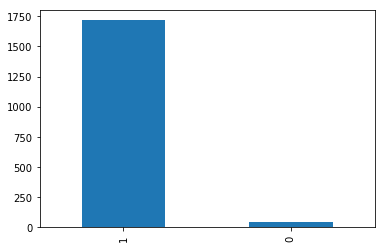

In [202]:
# Global accuracy plot

trials_df['Accuracy'].value_counts().plot(kind='bar')

In [203]:
# Accuracy for all participants: 

print("Participant 1 accuracy: " + str(trials_df[trials_df['Name'] == "cris"]['Accuracy'].mean()))
print("Participant 2 accuracy: " + str(trials_df[trials_df['Name'] == "maria"]['Accuracy'].mean()))
print("Participant 3 accuracy: " + str(trials_df[trials_df['Name'] == "Raul"]['Accuracy'].mean()))
print("Participant 4 accuracy: " + str(trials_df[trials_df['Name'] == "Vicky"]['Accuracy'].mean()))
print("Participant 5 accuracy: " + str(trials_df[trials_df['Name'] == "pilar"]['Accuracy'].mean()))
print("Participant 6 accuracy: " + str(trials_df[trials_df['Name'] == "Reme"]['Accuracy'].mean()))
print("Participant 7 accuracy: " + str(trials_df[trials_df['Name'] == "paula"]['Accuracy'].mean()))
print("Participant 8 accuracy: " + str(trials_df[trials_df['Name'] == "JuanCarlos"]['Accuracy'].mean()))
print("Participant 9 accuracy: " + str(trials_df[trials_df['Name'] == "Marta"]['Accuracy'].mean()))
print()
print("Global accuracy: " + str(trials_df['Accuracy'].mean()))


Participant 1 accuracy: 0.9896373056994818
Participant 2 accuracy: 0.9187817258883249
Participant 3 accuracy: 0.9898477157360406
Participant 4 accuracy: 0.9794871794871794
Participant 5 accuracy: 0.9949238578680203
Participant 6 accuracy: 0.9794871794871794
Participant 7 accuracy: 0.9432989690721649
Participant 8 accuracy: 1.0
Participant 9 accuracy: 0.9897959183673469

Global accuracy: 0.9761092150170648


## Participant RT Analysis

In [204]:
# Participants RTs Mean

RTcolumns = ['Participant', 'Subject', 'All_RT', 'Local_RT', 'Global_RT', 'GlobalLocal_RT']
meanRT_df = pd.DataFrame(columns=RTcolumns)

for name in trials_df.Name.unique():
    meanRT_df.loc[len(meanRT_df)] = [
            name,
            str(trials_df[trials_df['Name'] == name]['Subject'].values[1]),
            trials_df[trials_df['Name'] == name]['matrix1.RT'].mean(),
            trials_df[(trials_df['Name'] == name) & (trials_df['changetype'] == 'L')]['matrix1.RT'].mean(),
            trials_df[(trials_df['Name'] == name) & (trials_df['changetype'] == 'G')]['matrix1.RT'].mean(),
            trials_df[(trials_df['Name'] == name) & (trials_df['changetype'] == 'GL')]['matrix1.RT'].mean()]

meanRT_df

,Participant,Subject,All_RT,Local_RT,Global_RT,GlobalLocal_RT
0,cris,1,7626.274611,9707.884058,6657.688525,6284.253968
1,maria,2,7626.365482,9848.470588,6488.588235,6417.606557
2,Raul,3,7353.192893,9894.476923,5999.625000,6197.970588
3,Vicky,4,8455.666667,12424.814286,5931.227273,6570.457627
4,pilar,5,8002.913706,11016.217391,6602.971429,6107.706897
5,Reme,6,9498.446154,11389.859649,8917.462687,8528.239437
6,paula,7,8102.293814,8460.446429,7843.581081,8088.046875
7,JuanCarlos,8,9652.613402,10206.054795,9811.897059,8685.962264
8,Marta,9,8301.025510,13097.152542,5587.177419,6771.520000


In [205]:
# Participants RTs Median

RTcolumns = ['Participant', 'Subject', 'All_RT', 'Local_RT', 'Global_RT', 'GlobalLocal_RT']
medianRT_df = pd.DataFrame(columns=RTcolumns)

for name in trials_df.Name.unique():
    medianRT_df.loc[len(medianRT_df)] = [
            name,
            str(trials_df[trials_df['Name'] == name]['Subject'].values[1]),
            trials_df[trials_df['Name'] == name]['matrix1.RT'].median(),
            trials_df[(trials_df['Name'] == name) & (trials_df['changetype'] == 'L')]['matrix1.RT'].median(),
            trials_df[(trials_df['Name'] == name) & (trials_df['changetype'] == 'G')]['matrix1.RT'].median(),
            trials_df[(trials_df['Name'] == name) & (trials_df['changetype'] == 'GL')]['matrix1.RT'].median()]

medianRT_df

,Participant,Subject,All_RT,Local_RT,Global_RT,GlobalLocal_RT
0,cris,1,7327.0,9742.0,5930.0,5853.0
1,maria,2,7220.0,9362.0,6319.0,5840.0
2,Raul,3,5917.0,9802.0,4864.5,5751.5
3,Vicky,4,7169.0,12550.5,4469.5,5680.0
4,pilar,5,6547.0,10424.0,5891.0,5061.0
5,Reme,6,8604.0,10994.0,8528.0,8535.0
6,paula,7,7679.5,7935.0,7582.5,7737.5
7,JuanCarlos,8,9304.5,9670.0,8616.5,9641.0
8,Marta,9,7006.5,13346.0,4941.0,6207.0


In [209]:
# Sort by mean RT

meanRT_df = meanRT_df.sort_values(by='All_RT')
meanRT_df

,Participant,Subject,All_RT,Local_RT,Global_RT,GlobalLocal_RT
2,Raul,3,7353.192893,9894.476923,5999.625000,6197.970588
0,cris,1,7626.274611,9707.884058,6657.688525,6284.253968
1,maria,2,7626.365482,9848.470588,6488.588235,6417.606557
4,pilar,5,8002.913706,11016.217391,6602.971429,6107.706897
6,paula,7,8102.293814,8460.446429,7843.581081,8088.046875
8,Marta,9,8301.025510,13097.152542,5587.177419,6771.520000
3,Vicky,4,8455.666667,12424.814286,5931.227273,6570.457627
5,Reme,6,9498.446154,11389.859649,8917.462687,8528.239437
7,JuanCarlos,8,9652.613402,10206.054795,9811.897059,8685.962264


In [206]:
# Sort by median RT

medianRT_df = medianRT_df.sort_values(by='All_RT')
medianRT_df

,Participant,Subject,All_RT,Local_RT,Global_RT,GlobalLocal_RT
2,Raul,3,5917.0,9802.0,4864.5,5751.5
4,pilar,5,6547.0,10424.0,5891.0,5061.0
8,Marta,9,7006.5,13346.0,4941.0,6207.0
3,Vicky,4,7169.0,12550.5,4469.5,5680.0
1,maria,2,7220.0,9362.0,6319.0,5840.0
0,cris,1,7327.0,9742.0,5930.0,5853.0
6,paula,7,7679.5,7935.0,7582.5,7737.5
5,Reme,6,8604.0,10994.0,8528.0,8535.0
7,JuanCarlos,8,9304.5,9670.0,8616.5,9641.0


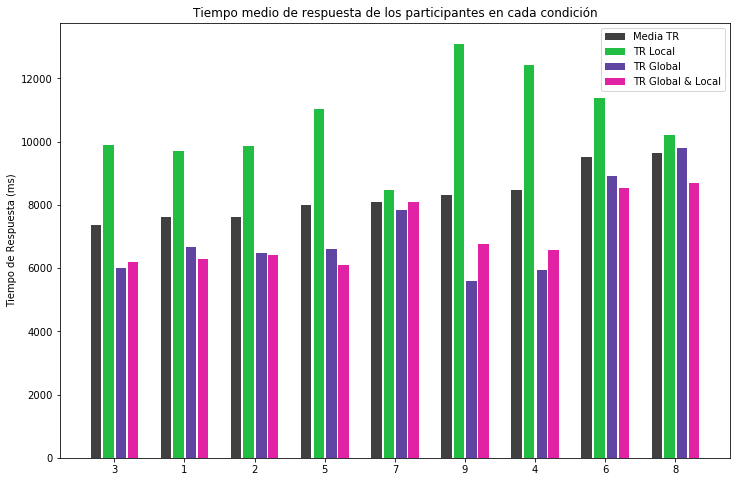

In [210]:
# Mean RT for all participants: 

fig8 = plt.figure(8, figsize=(12, 8))
ax8 = fig8.add_subplot(111)
participants = meanRT_df['Subject'].values
y_pos = np.arange(len(participants))
w = 0.3
sep = 0.02
ax8.bar(y_pos-sep*2-3*w/4, meanRT_df['All_RT'].values, color='0.25', width=w/2, align='center', alpha=1, label='Media TR')
ax8.bar(y_pos-sep/2-w/4, meanRT_df['Local_RT'].values,  color='#22be44', width=w/2, align='center', alpha=1, label='TR Local')
ax8.bar(y_pos+sep+w/4, meanRT_df['Global_RT'].values,  color='#5f44a2', width=w/2, align='center', alpha=1, label='TR Global ')
ax8.bar(y_pos+sep*2+3*w/4, meanRT_df['GlobalLocal_RT'].values,  color='#e222a4', width=w/2, align='center', alpha=1, label='TR Global & Local')
ax8.legend(loc="upper right")
# ax8.autoscale(tight=True)
plt.xticks(y_pos, participants)
plt.ylabel('Tiempo de Respuesta (ms)')
plt.title('Tiempo medio de respuesta de los participantes en cada condición')
plt.show()

In [211]:
# Save the figure
fig8.savefig('All_RT_means_es.png')

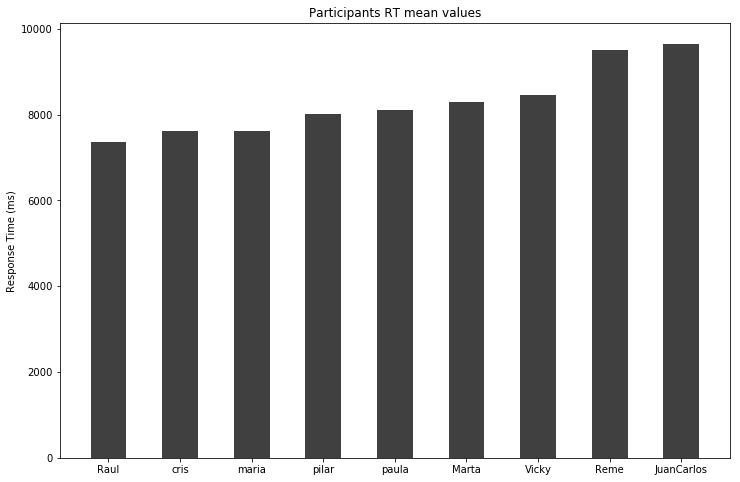

In [212]:
# Mean RT for all participants: 

fig9 = plt.figure(9, figsize=(12, 8))
ax9 = fig9.add_subplot(111)
participants = meanRT_df['Participant'].values
y_pos = np.arange(len(participants))
ax9.bar(y_pos, meanRT_df['All_RT'].values, color='0.25', width=0.5, align='center', alpha=1, label='Mean RT')
plt.xticks(y_pos, participants)
plt.ylabel('Response Time (ms)')
plt.title('Participants RT mean values')
plt.show()

In [1102]:
# Save the figure
fig9.savefig('Participants_RT_means.png')

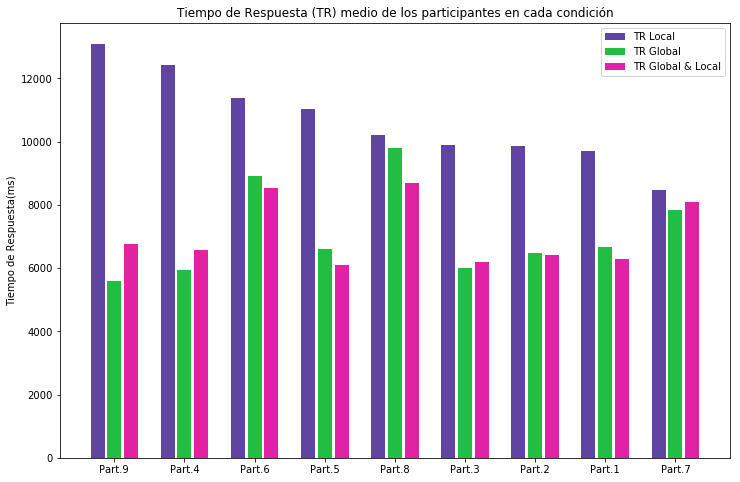

In [214]:
# Mean RT (L/G/GL) for all participants: 

# Sort by mean L RT
meanRT_df = meanRT_df.sort_values(by='Local_RT', ascending=0)

fig10 = plt.figure(8, figsize=(12, 8))
ax10 = fig10.add_subplot(111)

participants = meanRT_df['Subject'].values
plabels = list(participants)
for i in range(0,len(plabels)):
    plabels[i] = "Part."+plabels[i]
               
y_pos = np.arange(len(participants))
w = 0.4
sep = 0.04
ax10.bar(y_pos-sep-w/2, meanRT_df['Local_RT'].values,  color='#5f44a2', width=w/2, align='center', alpha=1, label='TR Local')
ax10.bar(y_pos, meanRT_df['Global_RT'].values,  color='#22be44', width=w/2, align='center', alpha=1, label='TR Global')
ax10.bar(y_pos+sep+w/2, meanRT_df['GlobalLocal_RT'].values,  color='#e222a4', width=w/2, align='center', alpha=1, label='TR Global & Local')
ax10.legend(loc="upper right")
# ax10.autoscale(tight=True)
plt.xticks(y_pos, plabels)
plt.ylabel('Tiempo de Respuesta(ms)')
plt.title('Tiempo de Respuesta (TR) medio de los participantes en cada condición')
plt.show()

In [215]:
# Save the figure
fig10.savefig('Participants_L-G-GL_means_es.png')

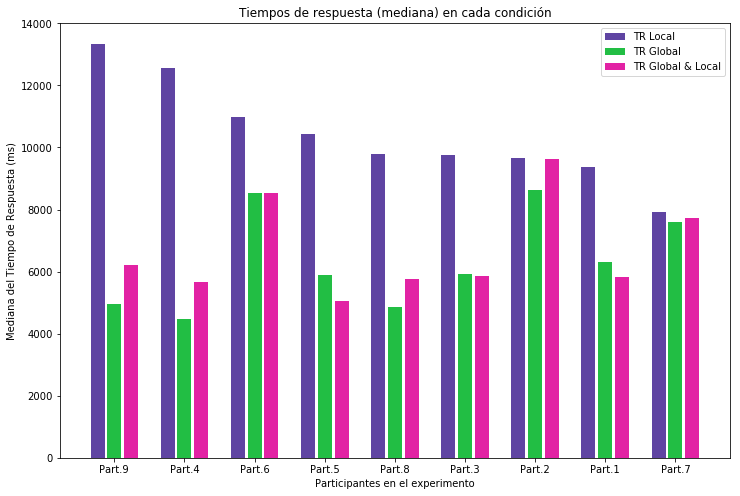

In [285]:
# Median RT (L/G/GL) for all participants: 

# Sort by median L RT
medianRT_df = medianRT_df.sort_values(by='Local_RT', ascending=0)

fig30 = plt.figure(8, figsize=(12, 8))
ax30 = fig30.add_subplot(111)

participants = meanRT_df['Subject'].values
plabels = list(participants)
for i in range(0,len(plabels)):
    plabels[i] = "Part."+plabels[i]
               
y_pos = np.arange(len(participants))
w = 0.4
sep = 0.04
ax30.bar(y_pos-sep-w/2, medianRT_df['Local_RT'].values,  color='#5f44a2', width=w/2, align='center', alpha=1, label='TR Local')
ax30.bar(y_pos, medianRT_df['Global_RT'].values,  color='#22be44', width=w/2, align='center', alpha=1, label='TR Global')
ax30.bar(y_pos+sep+w/2, medianRT_df['GlobalLocal_RT'].values,  color='#e222a4', width=w/2, align='center', alpha=1, label='TR Global & Local')
ax30.legend(loc="upper right")

plt.xticks(y_pos, plabels)
plt.ylabel('Mediana del Tiempo de Respuesta (ms)')
plt.xlabel('Participantes en el experimento')
plt.title('Tiempos de respuesta (mediana) en cada condición')
plt.show()

In [286]:
# Save the figure
fig30.savefig('Participants_L-G-GL_medians_es.png')

### Check change type distribution

In [219]:
# Total distribution of change type

trials_df['changetype'].value_counts()

G     600
L     586
GL    572
Name: changetype, dtype: int64

In [220]:
# Save all trials to a CSV 
trials_df.to_csv('TrialsResults.csv', sep ='\t')

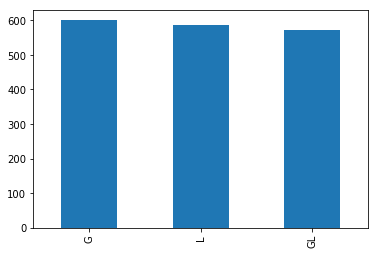

In [221]:
# Total distribution of change type - Plot

trials_df['changetype'].value_counts().plot(kind="bar")

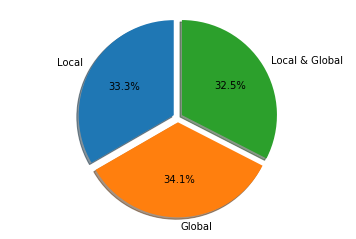

In [222]:
labels = 'Local', 'Global', 'Local & Global'
sizes = [trials_df['changetype'].value_counts()['L'], \
        trials_df['changetype'].value_counts()['G'], \
        trials_df['changetype'].value_counts()['GL']]
explode = (0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [1109]:
# Save the figure
fig1.savefig('piechart.png')

## RT Stats

In [223]:
# Response time for the three types of change

RT_L = trials_df[trials_df['changetype'] == 'L']['matrix1.RT']
RT_G = trials_df[trials_df['changetype'] == 'G']['matrix1.RT']
RT_GL = trials_df[trials_df['changetype'] == 'GL']['matrix1.RT']

In [427]:
# Response Time stats

print("MEAN:")
print("L changes RT mean: " + str(RT_L.mean()))
print("G changes RT mean: " + str(RT_G.mean()))
print("GL changes RT mean: " + str(RT_GL.mean()))
print("Total RT mean: " + str(trials_df['matrix1.RT'].mean()))
print()
print("STD:")
print("L changes RT std: " + str(np.std(RT_L)))
print("G changes RT std: " + str(np.std(RT_G)))
print("GL changes RT std: " + str(np.std(RT_GL)))
print("Total RT std: " + str(np.std(trials_df['matrix1.RT'])))
print()
print("MEDIAN:")
print("L changes RT median: " + str(RT_L.median()))
print("G changes RT median: " + str(RT_G.median()))
print("GL changes RT median: " + str(RT_GL.median()))
print("Total RT median: " + str(trials_df['matrix1.RT'].median()))


MEAN:
L changes RT mean: 10671.191126279864
G changes RT mean: 7127.495
GL changes RT mean: 7066.622377622378
Total RT mean: 8288.92093287827

STD:
L changes RT std: 4868.446250273121
G changes RT std: 4136.75243236064
GL changes RT std: 3859.690760927455
Total RT std: 4628.869594326424

MEDIAN:
L changes RT median: 10097.5
G changes RT median: 6169.0
GL changes RT median: 6186.5
Total RT median: 7363.0


In [242]:
# Response Time Stats
print("Local change detection RT Stats:")
RT_L.describe()

Local change detection RT Stats:


count      586.000000
mean     10671.191126
std       4872.605539
min        104.000000
25%       6983.250000
50%      10097.500000
75%      13927.750000
max      27032.000000
Name: matrix1.RT, dtype: float64

In [243]:
# Response Time Stats
print("Global change detection RT Stats:")
RT_G.describe()

Global change detection RT Stats:


count      600.000000
mean      7127.495000
std       4140.204041
min        709.000000
25%       3776.500000
50%       6169.000000
75%       9579.500000
max      26255.000000
Name: matrix1.RT, dtype: float64

In [245]:
# Response Time Stats
print("Global and Local change detection RT Stats:")
RT_GL.describe()

Global and Local change detection RT Stats:


count      572.000000
mean      7066.622378
std       3863.069047
min        278.000000
25%       3947.750000
50%       6186.500000
75%       9705.750000
max      23426.000000
Name: matrix1.RT, dtype: float64

## RT Vs. Type of Change  
### Analysis and Plots

Local change detection response time


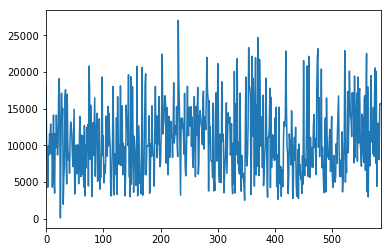

In [246]:
# RT Plots

print("Local change detection response time")
RT_L.plot(use_index=False)

Global change detection response time


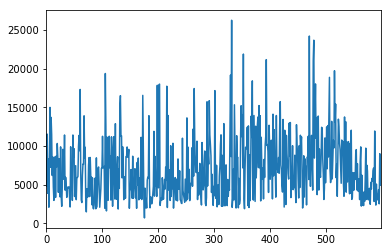

In [247]:
# RT Plots

print("Global change detection response time")
RT_G.plot(use_index=False)

Global and Local change detection response time


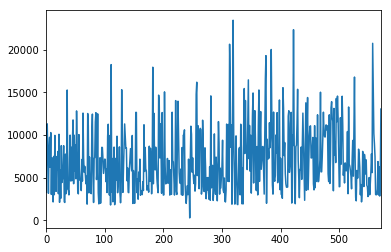

In [248]:
# RT Plots

print("Global and Local change detection response time")
RT_GL.plot(use_index=False)

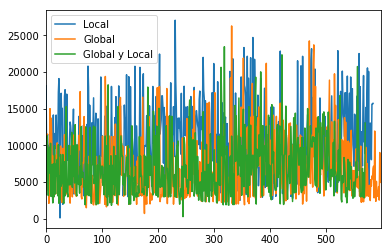

In [249]:
# RT Plots

RT_L.plot(use_index=False, legend=True, label="Local")
RT_G.plot(use_index=False, legend=True, label="Global")
RT_GL.plot(use_index=False, legend=True, label="Global y Local")

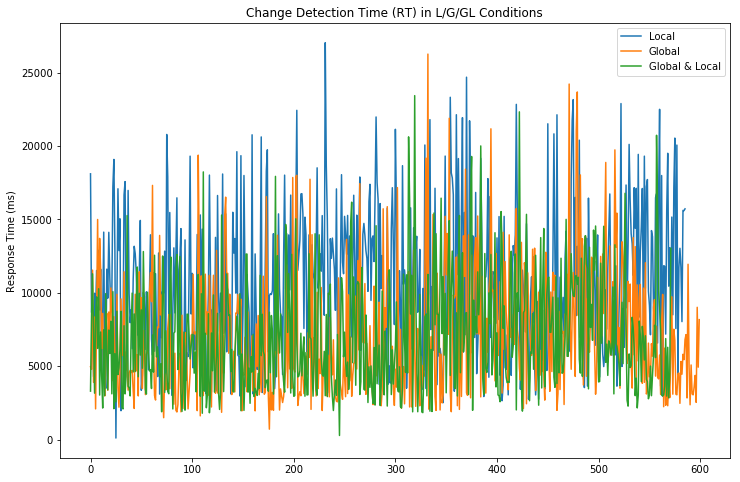

In [250]:
# RT Plots 

fig2 = plt.figure(2, figsize=(12, 8))
ax = fig2.add_subplot(111)

ax.plot(RT_L.values, '-', label="Local")
ax.plot(RT_G.values, '-', label="Global")
ax.plot(RT_GL.values, '-', label="Global & Local")
ax.legend(loc="upper right")
plt.title('Change Detection Time (RT) in L/G/GL Conditions')
plt.ylabel('Response Time (ms)')
plt.show()

In [1120]:
# Save the figure
fig2.savefig('RTs.png')

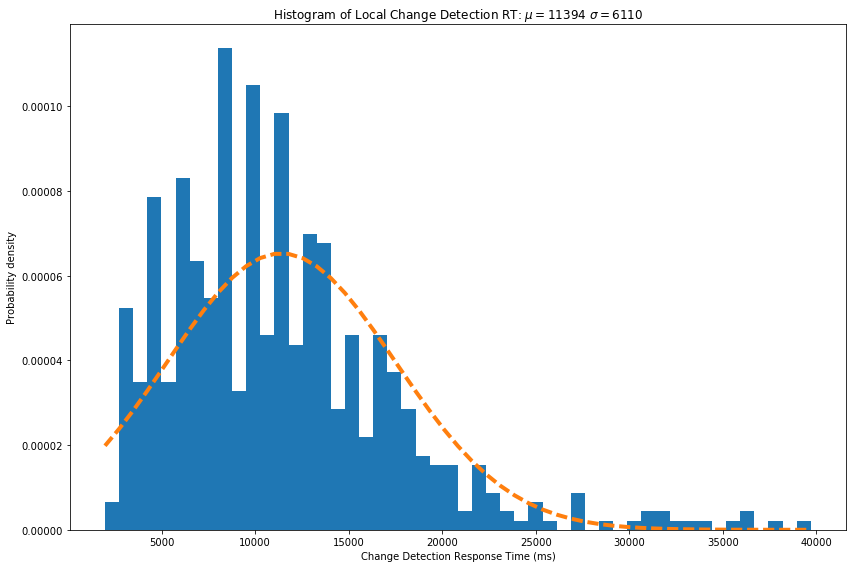

In [1122]:
# Hist for Local RT serie

num_bins = 50

fig3 = plt.figure(3, figsize=(12, 8))
ax = fig3.add_subplot(111)

# the histogram of the data
n, bins, patches = ax.hist(RT_L.values, num_bins, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, int(RT_L.values.mean()), int(RT_L.std()))
ax.plot(bins, y, '--',linewidth=4)
ax.set_xlabel('Change Detection Response Time (ms)')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of Local Change Detection RT: $\mu=' + 
             str(int(RT_L.values.mean())) + 
             '$ $\sigma= ' + str(int(RT_L.std())) + '$')
# Tweak spacing to prevent clipping of ylabel
fig3.tight_layout()
plt.show()

In [1123]:
# Save the figure
fig3.savefig('RT_L_hist.png')

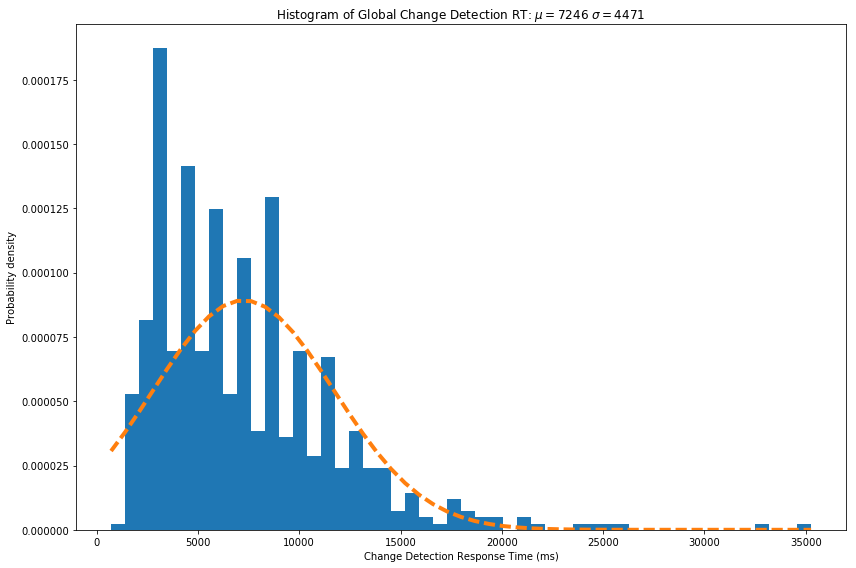

In [1124]:
# Hist for Global RT serie

num_bins = 50

fig4 = plt.figure(4, figsize=(12, 8))
ax = fig4.add_subplot(111)

# the histogram of the data
n, bins, patches = ax.hist(RT_G.values, num_bins, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, int(RT_G.values.mean()), int(RT_G.std()))
ax.plot(bins, y, '--', linewidth=4)
ax.set_xlabel('Change Detection Response Time (ms)')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of Global Change Detection RT: $\mu=' + 
             str(int(RT_G.values.mean())) + 
             '$ $\sigma= ' + str(int(RT_G.std())) + '$')

# Tweak spacing to prevent clipping of ylabel
fig4.tight_layout()
plt.show()

In [1125]:
# Save the figure
fig4.savefig('RT_G_hist.png')

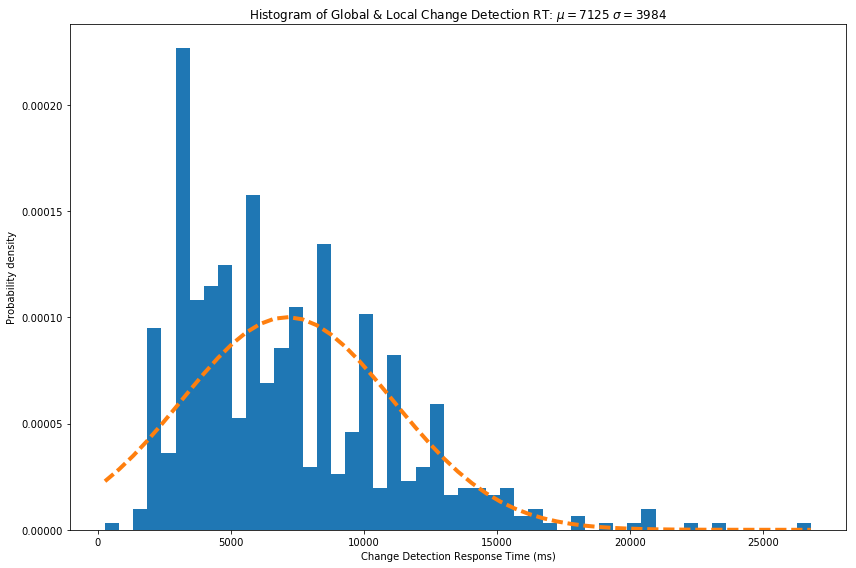

In [1126]:
# Hist for Global & Lcoal RT serie

num_bins = 50

fig5 = plt.figure(5, figsize=(12, 8))
ax = fig5.add_subplot(111)

# the histogram of the data
n, bins, patches = ax.hist(RT_GL.values, num_bins, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, int(RT_GL.values.mean()), int(RT_GL.std()))
ax.plot(bins, y, '--', linewidth=4)
ax.set_xlabel('Change Detection Response Time (ms)')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of Global & Local Change Detection RT: $\mu=' + 
             str(int(RT_GL.values.mean())) + 
             '$ $\sigma= ' + str(int(RT_GL.std())) + '$')

# Tweak spacing to prevent clipping of ylabel
fig5.tight_layout()
plt.show()

In [1127]:
# Save the figure
fig5.savefig('RT_GL_hist.png')

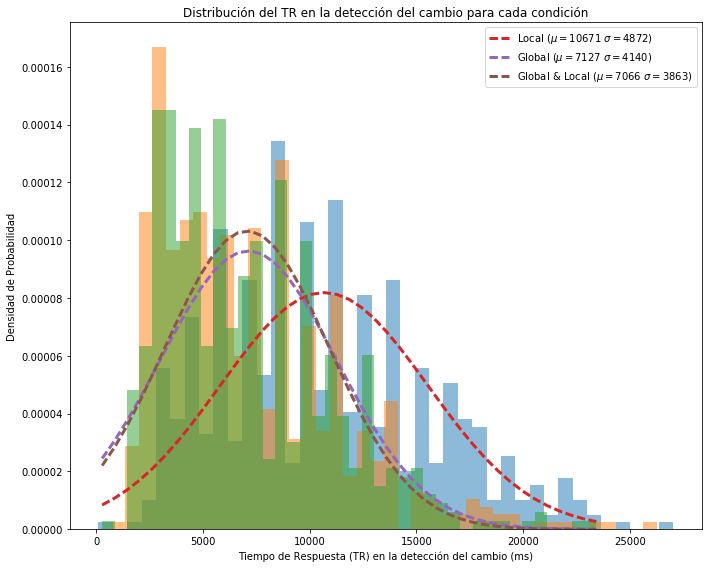

In [428]:
# Hist for all RT series

num_bins = 40

fig6 = plt.figure(6, figsize=(10, 8))
ax = fig6.add_subplot(111)

# the histogram of the data
n, bins, patches = ax.hist(RT_L.values, num_bins, alpha=0.5, normed=1)
n, bins, patches = ax.hist(RT_G.values, num_bins, alpha=0.5, normed=1)
n, bins, patches = ax.hist(RT_GL.values, num_bins, alpha=0.5, normed=1)

y = mlab.normpdf(bins, int(RT_L.values.mean()), int(RT_L.std()))
ax.plot(bins, y, '--', linewidth=3, label=r'Local ($\mu=' + str(int(RT_L.values.mean())) + '$ $\sigma= ' + str(int(RT_L.std())) + '$)')
y = mlab.normpdf(bins, int(RT_G.values.mean()), int(RT_G.std()))
ax.plot(bins, y, '--', linewidth=3, label=r'Global ($\mu=' + str(int(RT_G.values.mean())) + '$ $\sigma= ' + str(int(RT_G.std())) + '$)')
y = mlab.normpdf(bins, int(RT_GL.values.mean()), int(RT_GL.std()))
ax.plot(bins, y, '--', linewidth=3, label=r'Global & Local ($\mu=' + str(int(RT_GL.values.mean())) + '$ $\sigma= ' + str(int(RT_GL.std())) + '$)')

ax.set_xlabel('Tiempo de Respuesta (TR) en la detección del cambio (ms)')
ax.set_ylabel('Densidad de Probabilidad')
ax.set_title('Distribución del TR en la detección del cambio para cada condición')
ax.legend(loc="upper right")
# Tweak spacing to prevent clipping of ylabel
fig6.tight_layout()
plt.show()

In [257]:
# Save the figure
fig6.savefig('RT_All_hist_es.png')

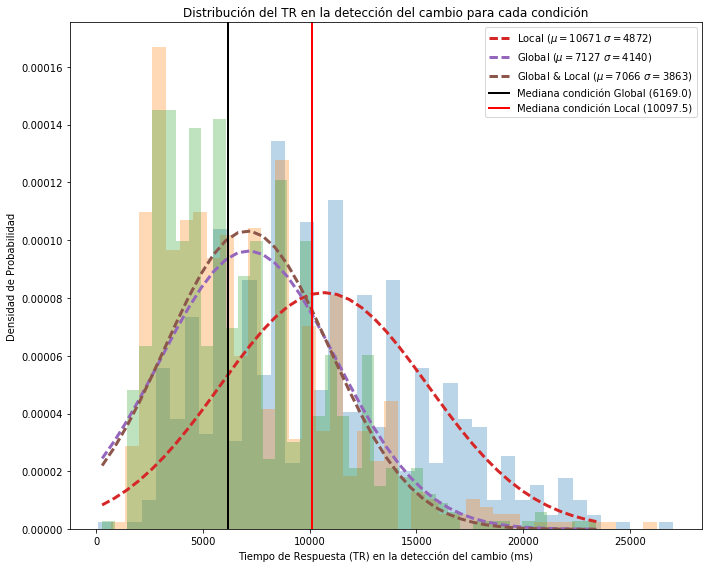

In [279]:
# Hist for all RT series

num_bins = 40

fig6 = plt.figure(6, figsize=(10, 8))
ax = fig6.add_subplot(111)

# the histogram of the data
n, bins, patches = ax.hist(RT_L.values, num_bins, alpha=0.3, normed=1)
n, bins, patches = ax.hist(RT_G.values, num_bins, alpha=0.3, normed=1)
n, bins, patches = ax.hist(RT_GL.values, num_bins, alpha=0.3, normed=1)

y = mlab.normpdf(bins, int(RT_L.values.mean()), int(RT_L.std()))
ax.plot(bins, y, '--', linewidth=3, label=r'Local ($\mu=' + str(int(RT_L.values.mean())) + '$ $\sigma= ' + str(int(RT_L.std())) + '$)')
y = mlab.normpdf(bins, int(RT_G.values.mean()), int(RT_G.std()))
ax.plot(bins, y, '--', linewidth=3, label=r'Global ($\mu=' + str(int(RT_G.values.mean())) + '$ $\sigma= ' + str(int(RT_G.std())) + '$)')
y = mlab.normpdf(bins, int(RT_GL.values.mean()), int(RT_GL.std()))
ax.plot(bins, y, '--', linewidth=3, label=r'Global & Local ($\mu=' + str(int(RT_GL.values.mean())) + '$ $\sigma= ' + str(int(RT_GL.std())) + '$)')

#plt.axvline(RT_L.values.mean(), color='b', linestyle='dashed', linewidth=2)
# ax.axvline(RT_L.values.mean(), color='b', linestyle='solid', linewidth=2, label='Media condición Local')
ax.axvline(np.median(RT_G.values), color='black', linestyle='solid', linewidth=2, label='Mediana condición Global (' + str(np.median(RT_G.values)) + ')')
# ax.axvline(np.median(RT_GL.values), color='grey', linestyle='solid', linewidth=2, label='Mediana condición G&L (' + str(np.median(RT_GL.values)) + ')')
ax.axvline(np.median(RT_L.values), color='red', linestyle='solid', linewidth=2, label='Mediana condición Local (' + str(np.median(RT_L.values)) + ')')



ax.set_xlabel('Tiempo de Respuesta (TR) en la detección del cambio (ms)')
ax.set_ylabel('Densidad de Probabilidad')
ax.set_title('Distribución del TR en la detección del cambio para cada condición')
ax.legend(loc="upper right")
# Tweak spacing to prevent clipping of ylabel
fig6.tight_layout()
plt.show()

In [280]:
# Save the figure
fig6.savefig('RT_All_hist_medianas_es.png')

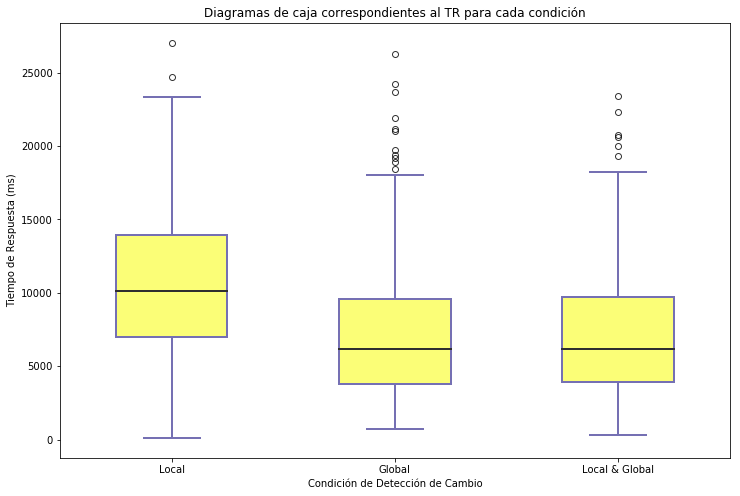

In [290]:
# RT Per Change Type Box plots 

fig7 = plt.figure(7, figsize=(12, 8))
ax = fig7.add_subplot(111)
xlabels=['Local', 'Global', 'Local & Global']
databp = [RT_L.values, RT_G.values, RT_GL.values]
bp = ax.boxplot(databp, widths=0.5, patch_artist=True)
# Colors
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#fbfe77' )
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
for median in bp['medians']:
    median.set(color='#2f2f2f', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.8)
ax.set_xticklabels(xlabels)
ax.set_xticks(np.arange(len(xlabels))+1)
ax.set_xlabel('Condición de Detección de Cambio')
ax.set_ylabel('Tiempo de Respuesta (ms)')
ax.set_title('Diagramas de caja correspondientes al TR para cada condición')
plt.show()

In [291]:
# Save the figure
fig7.savefig('boxplots_es.png', bbox_inches='tight')

## Hypothesis testing for RT Vs. Type of Change
### One way ANOVA and T-Test

In [370]:
len(RT_L)

586

In [371]:
len(RT_G)

600

In [372]:
len(RT_GL)

572

In [373]:
# One way ANOVA for RTs per change type

print("One Way ANOVA RT Variable for Local, Global and Local&Global changes:")
print(stats.f_oneway(RT_L, RT_G, RT_GL))
print()
print("One Way ANOVA RT Variable for Local and Global changes:")
print(stats.f_oneway(RT_L, RT_G))
print(stats.ttest_ind(RT_L, RT_G))
print()
print("One Way ANOVA RT Variable for Local and Local&Global changes:")
print(stats.f_oneway(RT_L, RT_GL))
print()
print("One Way ANOVA RT Variable for Global and Local&Global changes:")
print(stats.f_oneway(RT_G, RT_GL))

One Way ANOVA RT Variable for Local, Global and Local&Global changes:
F_onewayResult(statistic=133.98495327664529, pvalue=7.0380999135193258e-55)

One Way ANOVA RT Variable for Local and Global changes:
F_onewayResult(statistic=182.46861834378939, pvalue=8.8969562689342056e-39)
Ttest_indResult(statistic=13.508094548965428, pvalue=8.8969562689276477e-39)

One Way ANOVA RT Variable for Local and Local&Global changes:
F_onewayResult(statistic=193.99883331847258, pvalue=7.020279733422158e-41)

One Way ANOVA RT Variable for Global and Local&Global changes:
F_onewayResult(statistic=0.067569332330247742, pvalue=0.79495500593445345)


In [293]:
anova_L_G = stats.f_oneway(RT_L, RT_G)
anova_L_GL = stats.f_oneway(RT_L, RT_GL)
anova_G_GL = stats.f_oneway(RT_G, RT_G)
print("Anova Local-Global: " + str(anova_L_G))
print("Anova Local-Global&Local: " + str(anova_L_GL))
print("Anova Global-Global&Local: " + str(anova_G_GL))

Anova Local-Global: F_onewayResult(statistic=182.46861834378939, pvalue=8.8969562689342056e-39)
Anova Local-Global&Local: F_onewayResult(statistic=193.99883331847258, pvalue=7.020279733422158e-41)
Anova Global-Global&Local: F_onewayResult(statistic=0.067569332330247742, pvalue=0.79495500593445345)


In [294]:
from statsmodels.sandbox.stats.multicomp import multipletests
p_adjusted = multipletests(
    [anova_L_G.pvalue, anova_L_GL.pvalue, anova_G_GL.pvalue], 
    alpha=0.001, method='bonferroni')
print("Hypothesis rejected for given alpha: " + str(p_adjusted[0]))
print("Corrected p-value: " + str(p_adjusted[1]))
print("corrected alpha for Bonferroni method: " + str(p_adjusted[3]))

Hypothesis rejected for given alpha: [ True  True False]
Corrected p-value: [  2.66908688e-38   2.10608392e-40   1.00000000e+00]
corrected alpha for Bonferroni method: 0.0003333333333333333


## RT Vs. Circle Position
### Data Set, Analysis and Plots

In [297]:
# Mean RTs for positions

RTPosColumns = ['Pos', 'All_RT', 'Local_RT', 'Global_RT', 'GlobalLocal_RT']
meanRTPos_df = pd.DataFrame(columns=RTPosColumns)

for pos in trials_df.changedetected.unique():
    meanRTPos_df.loc[len(meanRTPos_df)] = [
            str(pos),
            trials_df[trials_df['changedetected'] == pos]['matrix1.RT'].mean(),
            trials_df[(trials_df['changedetected'] == pos) & (trials_df['changetype'] == 'L')]['matrix1.RT'].mean(),
            trials_df[(trials_df['changedetected'] == pos) & (trials_df['changetype'] == 'G')]['matrix1.RT'].mean(),
            trials_df[(trials_df['changedetected'] == pos) & (trials_df['changetype'] == 'GL')]['matrix1.RT'].mean()]
    
# Sort by pos
meanRTPos_df = meanRTPos_df.sort_values(by='Pos', ascending=1)

meanRTPos_df


,Pos,All_RT,Local_RT,Global_RT,GlobalLocal_RT
5,1,6650.825726,9475.259259,5336.469136,5102.518987
4,2,8242.266376,11288.367816,6293.940299,6449.293333
1,3,8030.278481,10362.671429,6882.904762,7224.397590
3,4,8998.629808,11041.245283,8142.012500,8468.906667
2,5,9148.644898,10840.506329,8499.689655,8171.455696
7,6,9208.553672,11066.277778,8270.767857,7550.591837
0,7,8219.935484,10630.974026,6863.828947,6929.531250
6,8,8096.303922,10767.223881,6793.289855,6786.838235


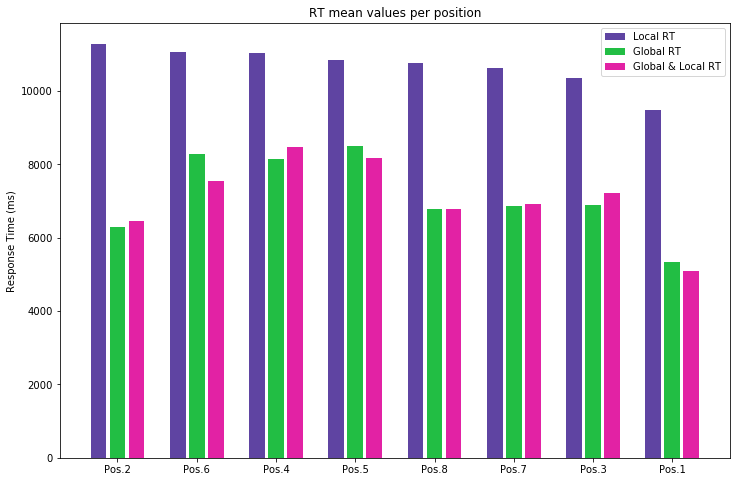

In [298]:
# Mean RT (L/G/GL) for all positions: 

# Sort by mean L RT
meanRTPos_df = meanRTPos_df.sort_values(by='Local_RT', ascending=0)

fig11 = plt.figure(11, figsize=(12, 8))
ax11 = fig11.add_subplot(111)

positions = meanRTPos_df['Pos'].values
plabels = list(positions)
for i in range(0,len(plabels)):
    plabels[i] = "Pos."+plabels[i]
               
y_pos = np.arange(len(positions))
w = 0.4
sep = 0.04
ax11.bar(y_pos-sep-w/2, meanRTPos_df['Local_RT'].values,  color='#5f44a2', width=w/2, align='center', alpha=1, label='Local RT')
ax11.bar(y_pos, meanRTPos_df['Global_RT'].values,  color='#22be44', width=w/2, align='center', alpha=1, label='Global RT')
ax11.bar(y_pos+sep+w/2, meanRTPos_df['GlobalLocal_RT'].values,  color='#e222a4', width=w/2, align='center', alpha=1, label='Global & Local RT')
ax11.legend(loc="upper right")
# ax11.autoscale(tight=True)
plt.xticks(y_pos, plabels)
plt.ylabel('Response Time (ms)')
plt.title('RT mean values per position')
plt.show()

In [1137]:
# Save the figure
fig11.savefig('RTsPerPos.png')

## Response Time (RT) Analysis per circle position and type of change

In [386]:
# RT per pos data

RTPosDataColumns = ['Pos', 'Local_RT', 'Global_RT', 'GlobalLocal_RT']
RTPos_df = pd.DataFrame(columns=RTPosDataColumns)

RTPos_df

,Pos,Local_RT,Global_RT,GlobalLocal_RT


In [407]:
# Response time for different circle positions

for i,row in trials_df.iterrows():
    ms_l = np.nan
    ms_g = np.nan
    ms_gl = np.nan 
    if (row['changetype'] == 'L'):
        ms_l = row['matrix1.RT']
    elif (row['changetype'] == 'G'):
        ms_g = row['matrix1.RT']
    elif (row['changetype'] == 'GL'):
        ms_gl = row['matrix1.RT']
                
    RTPos_df.loc[len(RTPos_df)] = [str(row['changecorrect']), ms_l, ms_g, ms_gl]
    
RTPos_df.head()

,Pos,Local_RT,Global_RT,GlobalLocal_RT
0,7,NaN,NaN,3298.0
1,3,18100.0,NaN,NaN
2,3,8665.0,NaN,NaN
3,5,NaN,NaN,8431.0
4,4,NaN,NaN,11288.0
5,2,8666.0,NaN,NaN
6,1,NaN,4957,NaN
7,3,NaN,NaN,7137.0
8,5,NaN,4788,NaN
9,5,NaN,11539,NaN


In [408]:
# RT data series per position

Pos1_RT_L = RTPos_df[RTPos_df['Pos'] == '1']['Local_RT'].dropna()
Pos1_RT_G = RTPos_df[RTPos_df['Pos'] == '1']['Global_RT'].dropna()
Pos1_RT_GL = RTPos_df[RTPos_df['Pos'] == '1']['GlobalLocal_RT'].dropna()
Pos1_RT = pd.concat([Pos1_RT_L,Pos1_RT_G,Pos1_RT_GL])

Pos2_RT_L = RTPos_df[RTPos_df['Pos'] == '2']['Local_RT'].dropna()
Pos2_RT_G = RTPos_df[RTPos_df['Pos'] == '2']['Global_RT'].dropna()
Pos2_RT_GL = RTPos_df[RTPos_df['Pos'] == '2']['GlobalLocal_RT'].dropna()
Pos2_RT = pd.concat([Pos2_RT_L,Pos2_RT_G,Pos2_RT_GL])

Pos3_RT_L = RTPos_df[RTPos_df['Pos'] == '3']['Local_RT'].dropna()
Pos3_RT_G = RTPos_df[RTPos_df['Pos'] == '3']['Global_RT'].dropna()
Pos3_RT_GL = RTPos_df[RTPos_df['Pos'] == '3']['GlobalLocal_RT'].dropna()
Pos3_RT = pd.concat([Pos3_RT_L,Pos3_RT_G,Pos3_RT_GL])

Pos4_RT_L = RTPos_df[RTPos_df['Pos'] == '4']['Local_RT'].dropna()
Pos4_RT_G = RTPos_df[RTPos_df['Pos'] == '4']['Global_RT'].dropna()
Pos4_RT_GL = RTPos_df[RTPos_df['Pos'] == '4']['GlobalLocal_RT'].dropna()
Pos4_RT = pd.concat([Pos4_RT_L,Pos4_RT_G,Pos4_RT_GL])

Pos5_RT_L = RTPos_df[RTPos_df['Pos'] == '5']['Local_RT'].dropna()
Pos5_RT_G = RTPos_df[RTPos_df['Pos'] == '5']['Global_RT'].dropna()
Pos5_RT_GL = RTPos_df[RTPos_df['Pos'] == '5']['GlobalLocal_RT'].dropna()
Pos5_RT = pd.concat([Pos5_RT_L,Pos5_RT_G,Pos5_RT_GL])

Pos6_RT_L = RTPos_df[RTPos_df['Pos'] == '6']['Local_RT'].dropna()
Pos6_RT_G = RTPos_df[RTPos_df['Pos'] == '6']['Global_RT'].dropna()
Pos6_RT_GL = RTPos_df[RTPos_df['Pos'] == '6']['GlobalLocal_RT'].dropna()
Pos6_RT = pd.concat([Pos6_RT_L,Pos6_RT_G,Pos6_RT_GL])

Pos7_RT_L = RTPos_df[RTPos_df['Pos'] == '7']['Local_RT'].dropna()
Pos7_RT_G = RTPos_df[RTPos_df['Pos'] == '7']['Global_RT'].dropna()
Pos7_RT_GL = RTPos_df[RTPos_df['Pos'] == '7']['GlobalLocal_RT'].dropna()
Pos7_RT = pd.concat([Pos7_RT_L,Pos7_RT_G,Pos7_RT_GL])

Pos8_RT_L = RTPos_df[RTPos_df['Pos'] == '8']['Local_RT'].dropna()
Pos8_RT_G = RTPos_df[RTPos_df['Pos'] == '8']['Global_RT'].dropna()
Pos8_RT_GL = RTPos_df[RTPos_df['Pos'] == '8']['GlobalLocal_RT'].dropna()
Pos8_RT = pd.concat([Pos8_RT_L,Pos8_RT_G,Pos8_RT_GL])


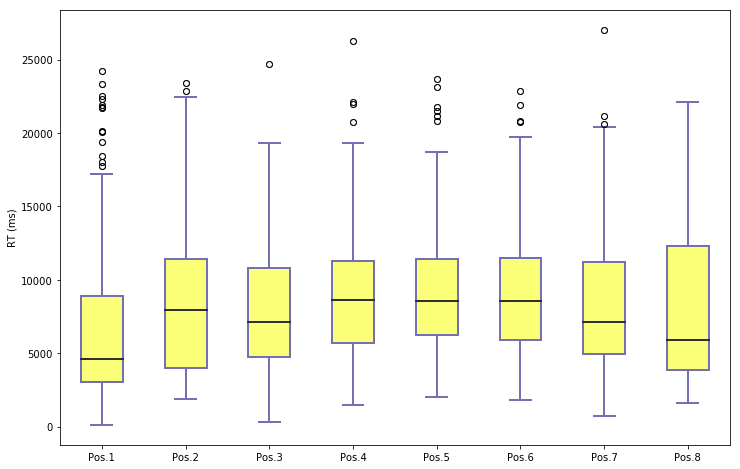

In [414]:
# RT Per Position Box plots - Local Changes

fig12 = plt.figure(12, figsize=(12, 8))
ax12 = fig12.add_subplot(111)
xlabels=['Pos.1', 'Pos.2', 'Pos.3', 'Pos.4', 'Pos.5', 'Pos.6', 'Pos.7', 'Pos.8']
ocho = Pos8_RT.values.astype(np.float)
databp = [Pos1_RT.values, 
          Pos2_RT.values, 
          Pos3_RT.values, 
          Pos4_RT.values, 
          Pos5_RT.values, 
          Pos6_RT.values, 
          Pos7_RT.values, 
          ocho]
bp = ax12.boxplot(databp, widths=0.5, patch_artist=True)
# Colors
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#fbfe77' )
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
for median in bp['medians']:
    median.set(color='#2f2f2f', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.8)
ax12.set_xticklabels(xlabels)
ax12.set_xticks(np.arange(len(xlabels))+1)
plt.ylabel('RT (ms)')
# plt.title('RT per stimulus position (local change type)')
plt.show()

In [390]:
# Save the figure
fig12.savefig('RTsPerPos-AnyChange.png')

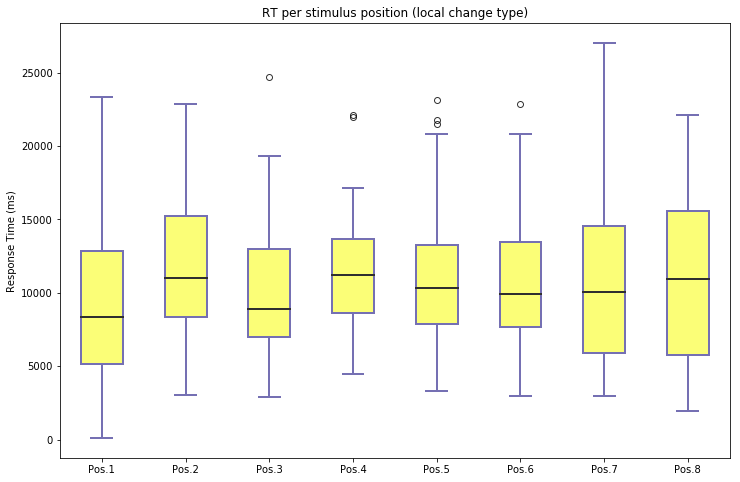

In [392]:
# RT Per Position Box plots - Local Changes

fig12 = plt.figure(12, figsize=(12, 8))
ax12 = fig12.add_subplot(111)
xlabels=['Pos.1', 'Pos.2', 'Pos.3', 'Pos.4', 'Pos.5', 'Pos.6', 'Pos.7', 'Pos.8']
databp = [Pos1_RT_L.values, Pos2_RT_L.values, Pos3_RT_L.values, Pos4_RT_L.values, Pos5_RT_L.values, Pos6_RT_L.values, Pos7_RT_L.values, Pos8_RT_L.values]
bp = ax12.boxplot(databp, widths=0.5, patch_artist=True)
# Colors
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#fbfe77' )
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
for median in bp['medians']:
    median.set(color='#2f2f2f', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.8)
ax12.set_xticklabels(xlabels)
ax12.set_xticks(np.arange(len(xlabels))+1)
plt.ylabel('Response Time (ms)')
plt.title('RT per stimulus position (local change type)')
plt.show()

In [1144]:
# Save the figure
fig12.savefig('RTsPerPos-LocalChange.png')

AttributeError: 'numpy.ndarray' object has no attribute 'find'

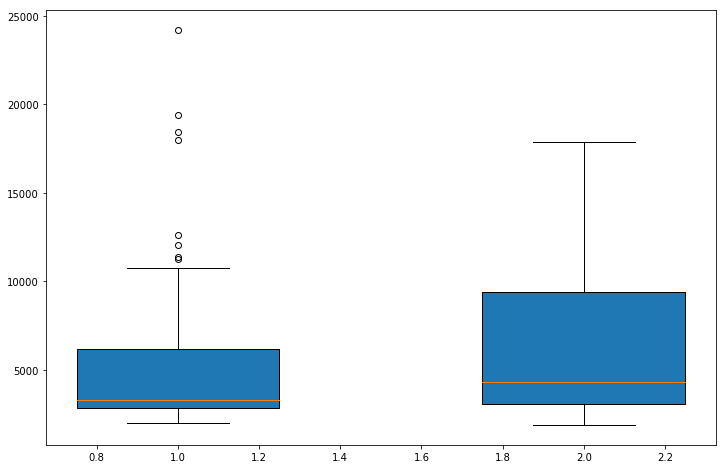

In [315]:
# RT Per Position Box plots - Global Changes

fig12 = plt.figure(12, figsize=(12, 8))
ax12 = fig12.add_subplot(111)
xlabels=['Pos.1', 'Pos.2', 'Pos.3', 'Pos.4', 'Pos.5', 'Pos.6', 'Pos.7', 'Pos.8']
databp = [Pos1_RT_G.values, Pos2_RT_G.values, Pos3_RT_G.values, Pos4_RT_G.values, Pos5_RT_G.values, Pos6_RT_G.values, Pos7_RT_G.values, Pos8_RT_G.values]
bp = ax12.boxplot(databp, widths=0.5, patch_artist=True)
# Colors
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#fbfe77' )
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
for median in bp['medians']:
    median.set(color='#2f2f2f', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.8)
ax12.set_xticklabels(xlabels)
ax12.set_xticks(np.arange(len(xlabels))+1)
plt.ylabel('Response Time (ms)')
plt.title('RT per stimulus position (global change type)')
plt.show()

In [ ]:
# Save the figure
fig12.savefig('RTsPerPos-GlobalChange.png')

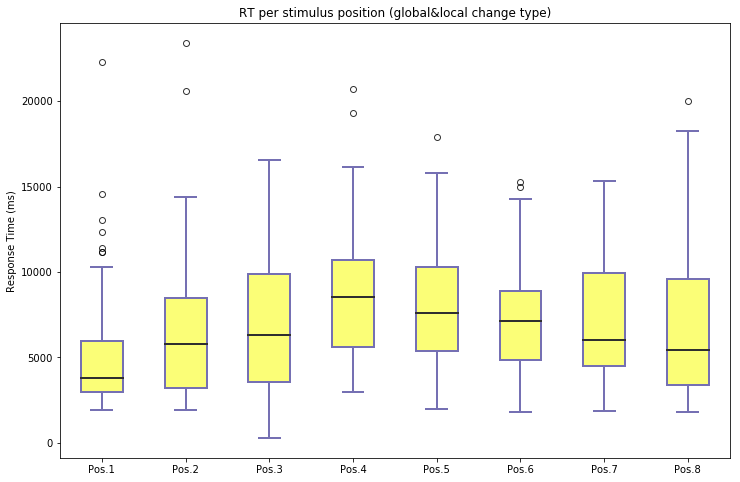

In [381]:
# RT Per Position Box plots - Global&Local Changes

fig12 = plt.figure(12, figsize=(12, 8))
ax12 = fig12.add_subplot(111)
xlabels=['Pos.1', 'Pos.2', 'Pos.3', 'Pos.4', 'Pos.5', 'Pos.6', 'Pos.7', 'Pos.8']
databp = [Pos1_RT_GL.values, Pos2_RT_GL.values, Pos3_RT_GL.values, Pos4_RT_GL.values, Pos5_RT_GL.values, Pos6_RT_GL.values, Pos7_RT_GL.values, Pos8_RT_GL.values]
bp = ax12.boxplot(databp, widths=0.5, patch_artist=True)
# Colors
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#fbfe77' )
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
for median in bp['medians']:
    median.set(color='#2f2f2f', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.8)
ax12.set_xticklabels(xlabels)
ax12.set_xticks(np.arange(len(xlabels))+1)
plt.ylabel('Response Time (ms)')
plt.title('RT per stimulus position (global&local change type)')
plt.show()

In [ ]:
# Save the figure
fig12.savefig('RTsPerPos-GlobalLocalChange.png')

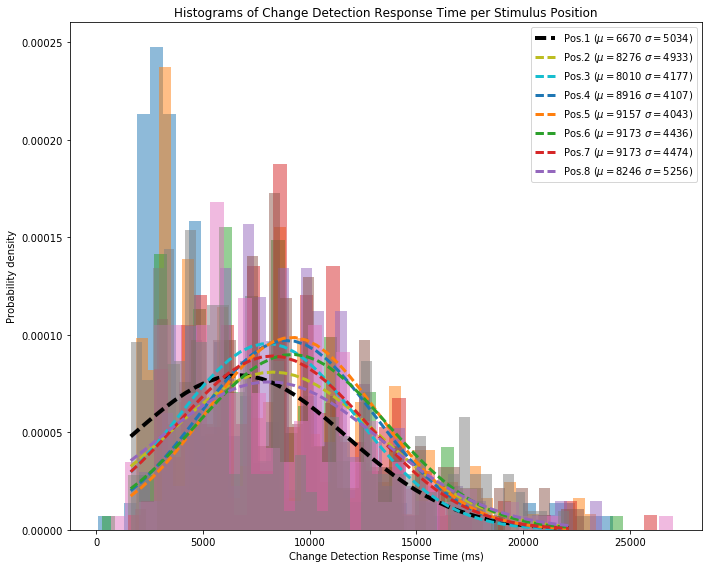

In [317]:
# Hist for all RT per position series

num_bins = 40

fig13 = plt.figure(13, figsize=(10, 8))
ax13 = fig13.add_subplot(111)

# the histogram of the data
n, bins, patches = ax13.hist(Pos1_RT.values, num_bins, alpha=0.5, normed=1)
n, bins, patches = ax13.hist(Pos2_RT.values, num_bins, alpha=0.5, normed=1)
n, bins, patches = ax13.hist(Pos3_RT.values, num_bins, alpha=0.5, normed=1)
n, bins, patches = ax13.hist(Pos4_RT.values, num_bins, alpha=0.5, normed=1)
n, bins, patches = ax13.hist(Pos5_RT.values, num_bins, alpha=0.5, normed=1)
n, bins, patches = ax13.hist(Pos6_RT.values, num_bins, alpha=0.5, normed=1)
n, bins, patches = ax13.hist(Pos7_RT.values, num_bins, alpha=0.5, normed=1)
n, bins, patches = ax13.hist(Pos8_RT.values, num_bins, alpha=0.5, normed=1)

y = mlab.normpdf(bins, int(Pos1_RT.values.mean()), int(Pos1_RT.std()))
ax13.plot(bins, y, '--', linewidth=4, color='#000000', label=r'Pos.1 ($\mu=' + str(int(Pos1_RT.values.mean())) + '$ $\sigma= ' + str(int(Pos1_RT.std())) + '$)')
y = mlab.normpdf(bins, int(Pos2_RT.values.mean()), int(Pos2_RT.std()))
ax13.plot(bins, y, '--', linewidth=3, label=r'Pos.2 ($\mu=' + str(int(Pos2_RT.values.mean())) + '$ $\sigma= ' + str(int(Pos2_RT.std())) + '$)')
y = mlab.normpdf(bins, int(Pos3_RT.values.mean()), int(Pos3_RT.std()))
ax13.plot(bins, y, '--', linewidth=3, label=r'Pos.3 ($\mu=' + str(int(Pos3_RT.values.mean())) + '$ $\sigma= ' + str(int(Pos3_RT.std())) + '$)')
y = mlab.normpdf(bins, int(Pos4_RT.values.mean()), int(Pos4_RT.std()))
ax13.plot(bins, y, '--', linewidth=3, label=r'Pos.4 ($\mu=' + str(int(Pos4_RT.values.mean())) + '$ $\sigma= ' + str(int(Pos4_RT.std())) + '$)')
y = mlab.normpdf(bins, int(Pos5_RT.values.mean()), int(Pos5_RT.std()))
ax13.plot(bins, y, '--', linewidth=3, label=r'Pos.5 ($\mu=' + str(int(Pos5_RT.values.mean())) + '$ $\sigma= ' + str(int(Pos5_RT.std())) + '$)')
y = mlab.normpdf(bins, int(Pos6_RT.values.mean()), int(Pos6_RT.std()))
ax13.plot(bins, y, '--', linewidth=3, label=r'Pos.6 ($\mu=' + str(int(Pos6_RT.values.mean())) + '$ $\sigma= ' + str(int(Pos6_RT.std())) + '$)')
y = mlab.normpdf(bins, int(Pos7_RT.values.mean()), int(Pos7_RT.std()))
ax13.plot(bins, y, '--', linewidth=3, label=r'Pos.7 ($\mu=' + str(int(Pos6_RT.values.mean())) + '$ $\sigma= ' + str(int(Pos7_RT.std())) + '$)')
y = mlab.normpdf(bins, int(Pos8_RT.values.mean()), int(Pos8_RT.std()))
ax13.plot(bins, y, '--', linewidth=3, label=r'Pos.8 ($\mu=' + str(int(Pos7_RT.values.mean())) + '$ $\sigma= ' + str(int(Pos8_RT.std())) + '$)')


ax13.set_xlabel('Change Detection Response Time (ms)')
ax13.set_ylabel('Probability density')
ax13.set_title('Histograms of Change Detection Response Time per Stimulus Position')
ax13.legend(loc="upper right")
# Tweak spacing to prevent clipping of ylabel
fig13.tight_layout()
plt.show()

In [ ]:
# Save the figure
fig13.savefig('RTsPerPos-Hists.png')

## Hypothesis testing RT Mean in different positions
### ANOVA and T-Test

In [318]:
# One way ANOVA for RTs per position

print("One Way ANOVA RT Variable for each position:")
print(stats.f_oneway(Pos1_RT, Pos2_RT, Pos3_RT, Pos4_RT, Pos5_RT, Pos6_RT, Pos6_RT, Pos7_RT, Pos8_RT))
print()
print("One Way ANOVA RT Variable for each position in Local Change condition:")
print(stats.f_oneway(Pos1_RT_L, Pos2_RT_L, Pos3_RT_L, Pos4_RT_L, Pos5_RT_L, Pos6_RT_L, Pos6_RT_L, Pos7_RT_L, Pos8_RT_L))
print()
print("One Way ANOVA RT Variable for each position in Global Change condition:")
print(stats.f_oneway(Pos1_RT_G, Pos2_RT_G, Pos3_RT_G, Pos4_RT_G, Pos5_RT_G, Pos6_RT_G, Pos6_RT_G, Pos7_RT_G, Pos8_RT_G))
print()
print("One Way ANOVA RT Variable for each position in Local&Global Change condition:")
print(stats.f_oneway(Pos1_RT_GL, Pos2_RT_GL, Pos3_RT_GL, Pos4_RT_GL, Pos5_RT_GL, Pos6_RT_GL, Pos6_RT_GL, Pos7_RT_GL, Pos8_RT_GL))
print()


One Way ANOVA RT Variable for each position:
F_onewayResult(statistic=7.1583457436848281, pvalue=2.2347302576715256e-09)

One Way ANOVA RT Variable for each position in Local Change condition:
F_onewayResult(statistic=1.0534340718130693, pvalue=0.39430820246241927)

One Way ANOVA RT Variable for each position in Global Change condition:
F_onewayResult(statistic=5.6837477396074094, pvalue=5.3401266416966343e-07)

One Way ANOVA RT Variable for each position in Local&Global Change condition:
F_onewayResult(statistic=5.0130911178471154, pvalue=4.8468040763625351e-06)



In [319]:
# T Test for RTs per position 

print("T-Test RT Variable for Positions 1 and 3:")
print(stats.ttest_ind(Pos1_RT, Pos3_RT))
print()
print("T-Test RT Variable for Positions 1 and 5:")
print(stats.ttest_ind(Pos1_RT, Pos5_RT))
print()
print("T-Test RT Variable for Positions 1 and 7:")
print(stats.ttest_ind(Pos1_RT, Pos7_RT))
print()
print("T-Test RT Variable for Positions 3 and 7:")
print(stats.ttest_ind(Pos3_RT, Pos7_RT))
print()
print("T-Test RT Variable for Positions 5 and 7:")
print(stats.ttest_ind(Pos5_RT, Pos7_RT))
print()

T-Test RT Variable for Positions 1 and 3:
Ttest_indResult(statistic=-3.1434172138422913, pvalue=0.0017752777601289069)

T-Test RT Variable for Positions 1 and 5:
Ttest_indResult(statistic=-6.0245674061759757, pvalue=3.3512723753754603e-09)

T-Test RT Variable for Positions 1 and 7:
Ttest_indResult(statistic=-3.5254067420397432, pvalue=0.00046557525684357161)

T-Test RT Variable for Positions 3 and 7:
Ttest_indResult(statistic=-0.57887948524309074, pvalue=0.56296206566739904)

T-Test RT Variable for Positions 5 and 7:
Ttest_indResult(statistic=2.304129412369833, pvalue=0.021658210912228842)



## PRIMING EFFECTS ANALYSIS
### Analysis of possible present priming effects:
- Previous trial type of change
- Previous trial position of change


In [320]:
# Build a delta-RT data set

# From one trial to the next, the following vbles are calculated:
RTDeltasColumns = ['Delta_RT',       # Difference in response time (RT) from last trial to current
                   'AttLevelChange', # Change in required attention level: local to global, global to local, etc. 
                   'AttChangeFlag',  # 1 indicates a change, 0 indicates no change in attention level.
                   'PosChange',      # Change in the changing stimulus position. 
                   'PosChangeFlag'   # 1 indicates a change, 0 indicates the change occurs in the same position. 
                    ]
RTDelta_df = pd.DataFrame(columns=RTDeltasColumns)

lastIndex = 9999999
count = 0
AttLevelChange = ' '
AttChangeFlag = 0
PosChange = ' '
PosChangeFlag = 0
Delta_RT = 0 

for i,curTrial in trials_df.iterrows():
    if (lastIndex > i):
        lastIndex = i
    if (count == 0):    
        lastTrial = curTrial.copy()
    elif (curTrial['Subject'] != lastTrial['Subject']):
        print("Skipping transtion from one subject to the following: " + lastTrial['Name'] + '->' + curTrial['Name'])
        lastTrial = curTrial.copy()
        # count = 0
    else:
        
        if (curTrial['changecorrect'] == lastTrial['changecorrect']):
            PosChangeFlag = 0
            PosChange = ' '
        else:
            PosChangeFlag = 1
            PosChange = str(lastTrial['changecorrect']) + "->" + str(curTrial['changecorrect'])
            
        if (curTrial['changetype'] == lastTrial['changetype']):
            AttChangeFlag = 0
            AttLevelChange = ' '
        else:
            AttChangeFlag = 1
            AttLevelChange = lastTrial['changetype'] + '->' + curTrial['changetype']
        
        # RT Delta must be relative to the mean RT of current trial condition and current subject
        if (curTrial['changetype'] == 'L'):           
            Delta_RT = curTrial['matrix1.RT'] - trials_df[(trials_df['Subject'] == curTrial['Subject']) & (trials_df['changetype']=='L')]['matrix1.RT'].mean() 
        elif (curTrial['changetype'] == 'G'):           
            Delta_RT = curTrial['matrix1.RT'] - trials_df[(trials_df['Subject'] == curTrial['Subject']) & (trials_df['changetype']=='G')]['matrix1.RT'].mean() 
        elif (curTrial['changetype'] == 'GL'):           
            Delta_RT = curTrial['matrix1.RT'] - trials_df[(trials_df['Subject'] == curTrial['Subject']) & (trials_df['changetype']=='GL')]['matrix1.RT'].mean() 
        else:
            print("ERROR: wrong change type")
        
        
        RTDelta_df.loc[len(RTDelta_df)] = [Delta_RT, AttLevelChange, AttChangeFlag, PosChange, PosChangeFlag]
            
        lastTrial = curTrial.copy()
    count += 1 
    
    # if (row['changetype'] == 'L'):
                
    # RTPos_df.loc[len(RTPos_df)] = [str(row['changecorrect']), ms_l, ms_g, ms_gl]
    
RTDelta_df.head()

Skipping transtion from one subject to the following: cris->maria
Skipping transtion from one subject to the following: maria->Raul
Skipping transtion from one subject to the following: Raul->Vicky
Skipping transtion from one subject to the following: Vicky->pilar
Skipping transtion from one subject to the following: pilar->Reme
Skipping transtion from one subject to the following: Reme->paula
Skipping transtion from one subject to the following: paula->JuanCarlos
Skipping transtion from one subject to the following: JuanCarlos->Marta


,Delta_RT,AttLevelChange,AttChangeFlag,PosChange,PosChangeFlag
0,8392.115942,GL->L,1.0,7->3,1.0
1,-1042.884058,,0.0,,0.0
2,2146.746032,L->GL,1.0,3->5,1.0
3,5003.746032,,0.0,5->4,1.0
4,-1041.884058,GL->L,1.0,4->2,1.0


In [327]:
# Build a RT data set with current trial RT and condition of transition from previous trial

# From one trial to the next, the following vbles are calculated:
RTCurrentColumns = ['RT',            # RT in current trial
                   'AttLevelChange', # Change in required attention level: local to global, global to local, etc. 
                   'AttChangeFlag',  # 1 indicates a change, 0 indicates no change in attention level.
                   'PosChange',      # Change in the changing stimulus position. 
                   'PosChangeFlag'   # 1 indicates a change, 0 indicates the change occurs in the same position. 
                    ]
RTCurrent_df = pd.DataFrame(columns=RTCurrentColumns)

lastIndex = 9999999
count = 0
AttLevelChange = ' '
AttChangeFlag = 0
PosChange = ' '
PosChangeFlag = 0

for i,curTrial in trials_df.iterrows():
    if (lastIndex > i):
        lastIndex = i
    if (count == 0):    
        lastTrial = curTrial.copy()
    elif (curTrial['Subject'] != lastTrial['Subject']):
        print("Skipping transtion from one subject to the following: " + lastTrial['Name'] + '->' + curTrial['Name'])
        lastTrial = curTrial.copy()
        # count = 0
    else:
        
        if (curTrial['changecorrect'] == lastTrial['changecorrect']):
            PosChangeFlag = 0
            PosChange = str(lastTrial['changecorrect']) + "->" + str(curTrial['changecorrect'])
        else:
            PosChangeFlag = 1
            PosChange = str(lastTrial['changecorrect']) + "->" + str(curTrial['changecorrect'])
            
        if (curTrial['changetype'] == lastTrial['changetype']):
            AttChangeFlag = 0
            PosChange = str(lastTrial['changecorrect']) + "->" + str(curTrial['changecorrect'])
            AttLevelChange = lastTrial['changetype'] + '->' + curTrial['changetype'] 
        else:
            AttChangeFlag = 1
            AttLevelChange = lastTrial['changetype'] + '->' + curTrial['changetype']      
        
        RTCurrent_df.loc[len(RTCurrent_df)] = [curTrial['matrix1.RT'], AttLevelChange, AttChangeFlag, PosChange, PosChangeFlag]
            
        lastTrial = curTrial.copy()
    count += 1 
        
RTCurrent_df.head()

Skipping transtion from one subject to the following: cris->maria
Skipping transtion from one subject to the following: maria->Raul
Skipping transtion from one subject to the following: Raul->Vicky
Skipping transtion from one subject to the following: Vicky->pilar
Skipping transtion from one subject to the following: pilar->Reme
Skipping transtion from one subject to the following: Reme->paula
Skipping transtion from one subject to the following: paula->JuanCarlos
Skipping transtion from one subject to the following: JuanCarlos->Marta


,RT,AttLevelChange,AttChangeFlag,PosChange,PosChangeFlag
0,18100.0,GL->L,1.0,7->3,1.0
1,8665.0,L->L,0.0,3->3,0.0
2,8431.0,L->GL,1.0,3->5,1.0
3,11288.0,GL->GL,0.0,5->4,1.0
4,8666.0,GL->L,1.0,4->2,1.0


In [328]:
# Segmenting data set and summary - Deltas

RT_Delta_PosChange = RTDelta_df[RTDelta_df['PosChangeFlag'] == 1]
RT_Delta_NoPosChange = RTDelta_df[RTDelta_df['PosChangeFlag'] == 0]
RT_Delta_AttChange = RTDelta_df[RTDelta_df['AttChangeFlag'] == 1]
RT_Delta_NoAttChange = RTDelta_df[RTDelta_df['AttChangeFlag'] == 0]

RT_Delta_AttChange_L_GL =  RTDelta_df[(RTDelta_df['AttChangeFlag'] == 1) & (RTDelta_df['AttLevelChange'] == 'L->GL')]
RT_Delta_AttChange_L_G =  RTDelta_df[(RTDelta_df['AttChangeFlag'] == 1) & (RTDelta_df['AttLevelChange'] == 'L->G')]
RT_Delta_AttChange_G_L =  RTDelta_df[(RTDelta_df['AttChangeFlag'] == 1) & (RTDelta_df['AttLevelChange'] == 'G->L')]
RT_Delta_AttChange_GL_L =  RTDelta_df[(RTDelta_df['AttChangeFlag'] == 1) & (RTDelta_df['AttLevelChange'] == 'GL->L')]
RT_Delta_AttChange_L_ = pd.concat([RT_Delta_AttChange_L_GL, RT_Delta_AttChange_L_G, RT_Delta_AttChange_G_L, RT_Delta_AttChange_GL_L])

RT_Delta_AttChange_G_GL =  RTDelta_df[(RTDelta_df['AttChangeFlag'] == 1) & (RTDelta_df['AttLevelChange'] == 'G->GL')]
RT_Delta_AttChange_GL_G =  RTDelta_df[(RTDelta_df['AttChangeFlag'] == 1) & (RTDelta_df['AttLevelChange'] == 'GL->G')]
RT_Delta_AttChange_G_ = pd.concat([RT_Delta_AttChange_G_GL, RT_Delta_AttChange_GL_G])

print('Trials with changes in position: ' + str(len(RT_Delta_PosChange)))
print('Trials with no change in position: ' + str(len(RT_Delta_NoPosChange)))
print()
print('Trials with changes in attention level: ' + str(len(RT_Delta_AttChange)))
print('Trials with no change in position: ' + str(len(RT_Delta_NoAttChange)))
print()
print('Trials with changes in attention level (L -> GL): ' + str(len(RT_Delta_AttChange_L_GL)))
print('Trials with changes in attention level (L -> G): ' + str(len(RT_Delta_AttChange_L_G)))
print('Trials with changes in attention level (G -> L): ' + str(len(RT_Delta_AttChange_G_L)))
print('Trials with changes in attention level (GL -> L): ' + str(len(RT_Delta_AttChange_GL_L)))
print('Trials with changes in attention level (L Vs. G): ' + str(len(RT_Delta_AttChange_L_)))
print()
print('Trials with changes in attention level (G -> GL): ' + str(len(RT_Delta_AttChange_G_GL)))
print('Trials with changes in attention level (GL -> G): ' + str(len(RT_Delta_AttChange_GL_G)))
print('Trials with changes in attention level (GL Vs. G): ' + str(len(RT_Delta_AttChange_G_)))
print()
print('All combinations covered: ' + str(len(RT_Delta_AttChange)) + ' = ' + str(len(RT_Delta_AttChange_G_)+len(RT_Delta_AttChange_L_)))

Trials with changes in position: 1507
Trials with no change in position: 242

Trials with changes in attention level: 1142
Trials with no change in position: 607

Trials with changes in attention level (L -> GL): 185
Trials with changes in attention level (L -> G): 194
Trials with changes in attention level (G -> L): 191
Trials with changes in attention level (GL -> L): 186
Trials with changes in attention level (L Vs. G): 756

Trials with changes in attention level (G -> GL): 193
Trials with changes in attention level (GL -> G): 193
Trials with changes in attention level (GL Vs. G): 386

All combinations covered: 1142 = 1142


In [329]:
# Segmenting data set and summary - Current

RT_PosChange = RTCurrent_df[RTCurrent_df['PosChangeFlag'] == 1]
RT_NoPosChange = RTCurrent_df[RTCurrent_df['PosChangeFlag'] == 0]
RT_AttChange = RTCurrent_df[RTCurrent_df['AttChangeFlag'] == 1]
RT_NoAttChange = RTCurrent_df[RTCurrent_df['AttChangeFlag'] == 0]

RT_NoAttChange_L_L =  RTCurrent_df[(RTCurrent_df['AttChangeFlag'] == 0) & (RTCurrent_df['AttLevelChange'] == 'L->L')]
RT_NoAttChange_G_G =  RTCurrent_df[(RTCurrent_df['AttChangeFlag'] == 0) & (RTCurrent_df['AttLevelChange'] == 'G->G')]
RT_NoAttChange_GL_GL =  RTCurrent_df[(RTCurrent_df['AttChangeFlag'] == 0) & (RTCurrent_df['AttLevelChange'] == 'GL->GL')]

RT_AttChange_L_GL =  RTCurrent_df[(RTCurrent_df['AttChangeFlag'] == 1) & (RTCurrent_df['AttLevelChange'] == 'L->GL')]
RT_AttChange_L_G =  RTCurrent_df[(RTCurrent_df['AttChangeFlag'] == 1) & (RTCurrent_df['AttLevelChange'] == 'L->G')]
RT_AttChange_G_L =  RTCurrent_df[(RTCurrent_df['AttChangeFlag'] == 1) & (RTCurrent_df['AttLevelChange'] == 'G->L')]
RT_AttChange_GL_L =  RTCurrent_df[(RTCurrent_df['AttChangeFlag'] == 1) & (RTCurrent_df['AttLevelChange'] == 'GL->L')]
RT_AttChange_L_ = pd.concat([RT_AttChange_L_GL, RT_AttChange_L_G, RT_AttChange_G_L, RT_AttChange_GL_L])

RT_AttChange_G_GL =  RTCurrent_df[(RTCurrent_df['AttChangeFlag'] == 1) & (RTCurrent_df['AttLevelChange'] == 'G->GL')]
RT_AttChange_GL_G =  RTCurrent_df[(RTCurrent_df['AttChangeFlag'] == 1) & (RTCurrent_df['AttLevelChange'] == 'GL->G')]
RT_AttChange_G_ = pd.concat([RT_AttChange_G_GL,RT_AttChange_GL_G])

print('Trials with changes in position: ' + str(len(RT_PosChange)))
print('Trials with no change in position: ' + str(len(RT_NoPosChange)))
print()
print('Trials with changes in attention level: ' + str(len(RT_AttChange)))
print('Trials with no change in position: ' + str(len(RT_NoAttChange)))
print()
print('Trials with no change in position (L->L): ' + str(len(RT_NoAttChange_L_L)))
print('Trials with no change in position (G->G): ' + str(len(RT_NoAttChange_G_G)))
print('Trials with no change in position (GL->GL): ' + str(len(RT_NoAttChange_GL_GL)))
print()
print('Trials with changes in attention level (L -> GL): ' + str(len(RT_AttChange_L_GL)))
print('Trials with changes in attention level (L -> G): ' + str(len(RT_AttChange_L_G)))
print('Trials with changes in attention level (G -> L): ' + str(len(RT_AttChange_G_L)))
print('Trials with changes in attention level (GL -> L): ' + str(len(RT_AttChange_GL_L)))
print('Trials with changes in attention level (L Vs. G): ' + str(len(RT_AttChange_L_)))
print()
print('Trials with changes in attention level (G -> GL): ' + str(len(RT_AttChange_G_GL)))
print('Trials with changes in attention level (GL -> G): ' + str(len(RT_AttChange_GL_G)))
print('Trials with changes in attention level (GL Vs. G): ' + str(len(RT_AttChange_G_)))
print()
print('All combinations covered: ' + str(len(RT_AttChange)) + ' = ' + str(len(RT_AttChange_G_)+len(RT_AttChange_L_)))

Trials with changes in position: 1507
Trials with no change in position: 242

Trials with changes in attention level: 1142
Trials with no change in position: 607

Trials with no change in position (L->L): 205
Trials with no change in position (G->G): 211
Trials with no change in position (GL->GL): 191

Trials with changes in attention level (L -> GL): 185
Trials with changes in attention level (L -> G): 194
Trials with changes in attention level (G -> L): 191
Trials with changes in attention level (GL -> L): 186
Trials with changes in attention level (L Vs. G): 756

Trials with changes in attention level (G -> GL): 193
Trials with changes in attention level (GL -> G): 193
Trials with changes in attention level (GL Vs. G): 386

All combinations covered: 1142 = 1142


### Effects of Position Change

In [330]:
# Comparing position change and no position change conditions

print("Mean RT Delta after no stiumulus position change: " + str(RT_Delta_NoPosChange['Delta_RT'].mean()))
print("Mean RT Delta after stiumulus position change: " + str(RT_Delta_PosChange['Delta_RT'].mean()))
print()
print("Mean RT after no stiumulus position change: " + str(RT_NoPosChange['RT'].mean()))
print("Mean RT after stiumulus position change: " + str(RT_PosChange['RT'].mean()))

Mean RT Delta after no stiumulus position change: -1377.1232002697927
Mean RT Delta after stiumulus position change: 219.37796351095918

Mean RT after no stiumulus position change: 6955.94214876033
Mean RT after stiumulus position change: 8498.341738553418


In [374]:
len(RT_NoPosChange['RT'])

242

In [375]:
len(RT_PosChange['RT'])

1507

In [376]:
print("T-Test Delta RT Variable for Change Vs. No Change in position:")
print(stats.ttest_ind(RT_Delta_NoPosChange['Delta_RT'], RT_Delta_PosChange['Delta_RT']))
print()
print("One Way ANOVA Delta RT Variable for Change Vs. No Change in position:")
print(stats.f_oneway(RT_Delta_NoPosChange['Delta_RT'], RT_Delta_PosChange['Delta_RT']))
print()
print("T-Test RT Variable for Change Vs. No Change in position:")
print(stats.ttest_ind(RT_PosChange['RT'], RT_NoPosChange['RT'], ))
print()
print("One Way ANOVA RT Variable for Change Vs. No Change in position:")
print(stats.f_oneway(RT_NoPosChange['RT'], RT_PosChange['RT']))
print()

T-Test Delta RT Variable for Change Vs. No Change in position:
Ttest_indResult(statistic=-5.6275040224834925, pvalue=2.1256880923989468e-08)

One Way ANOVA Delta RT Variable for Change Vs. No Change in position:
F_onewayResult(statistic=31.668801523067899, pvalue=2.1256880923980035e-08)

T-Test RT Variable for Change Vs. No Change in position:
Ttest_indResult(statistic=4.8404541208707146, pvalue=1.4095333051911777e-06)

One Way ANOVA RT Variable for Change Vs. No Change in position:
F_onewayResult(statistic=23.429996096254268, pvalue=1.4095333051907972e-06)



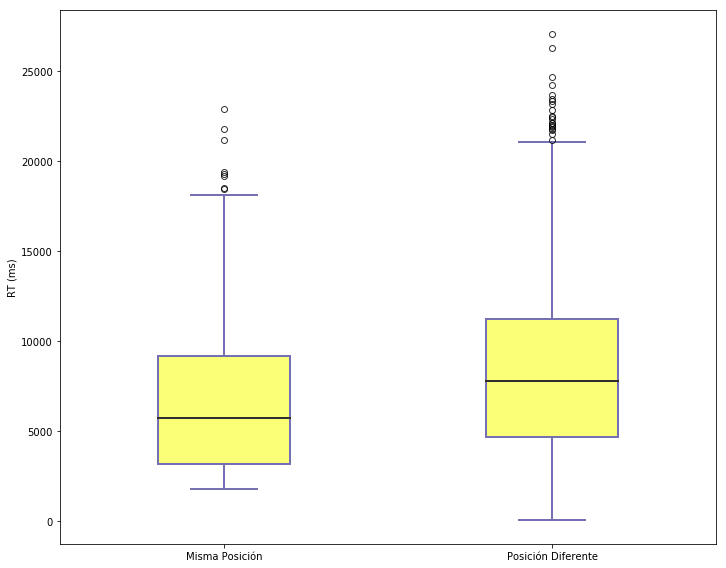

In [380]:
# Position Change priming Box plot 

fig14 = plt.figure(14, figsize=(10, 8))
ax14 = fig14.add_subplot(111)
xlabels=['Misma Posición', 'Posición Diferente']
databp = [RT_NoPosChange['RT'], RT_PosChange['RT']]
bp = ax14.boxplot(databp, widths=0.4, patch_artist=True)
# Colors
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#fbfe77' )
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
for median in bp['medians']:
    median.set(color='#2f2f2f', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.8)
ax14.set_xticklabels(xlabels)
#ax14.set_xticks(np.arange(len(xlabels))+1)
fig14.tight_layout()
plt.ylabel('RT (ms)')
# plt.title('RT priming based on target stimulus position change')
plt.show()

In [378]:
# Save the figure
fig14.savefig('PosPriming-Boxes_es.png')

### Effects of attention level change

In [333]:
# Comparing attention level change and no attention level change conditions

print("Mean RT Delta after no attention level change: " + str(RT_Delta_NoAttChange['Delta_RT'].mean()))
print("Mean RT Delta after attention level change: " + str(RT_Delta_AttChange['Delta_RT'].mean()))
print()
print("Mean RT Delta from Local to Global: " + str(RT_Delta_AttChange_L_G['Delta_RT'].mean()))
print("Mean RT Delta from Global to Local: " + str(RT_Delta_AttChange_G_L['Delta_RT'].mean()))
print()
print("Mean RT Delta from Local to Global&Local: " + str(RT_Delta_AttChange_L_GL['Delta_RT'].mean()))
print("Mean RT Delta from Global&Local to Local: " + str(RT_Delta_AttChange_GL_L['Delta_RT'].mean()))
print()
print("Mean RT Delta from Global to Global&Local: " + str(RT_Delta_AttChange_G_GL['Delta_RT'].mean()))
print("Mean RT Delta from Global&Local to Global: " + str(RT_Delta_AttChange_GL_G['Delta_RT'].mean()))
print()
print()
print("Mean RT after no attention level change: " + str(RT_NoAttChange['RT'].mean()))
print("Mean RT after attention level change: " + str(RT_AttChange['RT'].mean()))
print()
print("Mean RT from Local to Local: " + str(RT_NoAttChange_L_L['RT'].mean()))
print("Mean RT from Global to Local: " + str(RT_AttChange_G_L['RT'].mean()))
print("Mean RT from Global&Local to Local: " + str(RT_AttChange_GL_L['RT'].mean()))
print()
print("Mean RT from Local to Global: " + str(RT_AttChange_L_G['RT'].mean()))
print("Mean RT from Global to Global: " + str(RT_NoAttChange_G_G['RT'].mean()))
print("Mean RT from Global&Local to Global: " + str(RT_AttChange_GL_G['RT'].mean()))
print()
print("Mean RT from Global&Local to Global&Local: " + str(RT_NoAttChange_GL_GL['RT'].mean()))
print("Mean RT from Local to Global&Local: " + str(RT_AttChange_L_GL['RT'].mean()))
print("Mean RT from Global to Global&Local: " + str(RT_AttChange_G_GL['RT'].mean()))


Mean RT Delta after no attention level change: -274.7154972270017
Mean RT Delta after attention level change: 143.6874635398609

Mean RT Delta from Local to Global: 152.13210493979255
Mean RT Delta from Global to Local: 403.13947980810025

Mean RT Delta from Local to Global&Local: -112.0880482633184
Mean RT Delta from Global&Local to Local: 404.5223594154111

Mean RT Delta from Global to Global&Local: -70.57190347505554
Mean RT Delta from Global&Local to Global: 86.49389538334619


Mean RT after no attention level change: 8041.433278418452
Mean RT after attention level change: 8414.351138353766

Mean RT from Local to Local: 9849.619512195122
Mean RT from Global to Local: 11038.659685863875
Mean RT from Global&Local to Local: 11186.71505376344

Mean RT from Local to Global: 7246.484536082474
Mean RT from Global to Global: 6951.417061611374
Mean RT from Global&Local to Global: 7211.829015544042

Mean RT from Global&Local to Global&Local: 7304.863874345549
Mean RT from Local to Global&Loc

In [334]:
print(" DELTA RTs - NO SIGNIFICATIVE")
print()
print("T-Test Delta RT Variable for Change Vs. No Change in attention level:")
print(stats.ttest_ind(RT_Delta_NoAttChange['Delta_RT'], RT_Delta_AttChange['Delta_RT']))
print()
print("One Way ANOVA Delta RT Variable for Change Vs. No Change in attention level:")
print(stats.f_oneway(RT_Delta_NoAttChange['Delta_RT'], RT_Delta_AttChange['Delta_RT']))
print()
print("One Way ANOVA Delta RT Variable for Change Vs. Local Changes in attention level:")
print(stats.f_oneway(RT_Delta_NoAttChange['Delta_RT'], RT_Delta_AttChange_L_['Delta_RT']))
print()
print("Investigate further for significant differences in Local versus Global changes:")
print()
print()
print("One Way ANOVA Delta RT Variable for L->GL Change Vs. GL->L Change in attention level:")
print(stats.f_oneway(RT_Delta_AttChange_L_GL['Delta_RT'], RT_Delta_AttChange_GL_L['Delta_RT']))
print()
print("One Way ANOVA Delta RT Variable for L->G Change Vs. G->L Change in attention level:")
print(stats.f_oneway(RT_Delta_AttChange_L_G['Delta_RT'], RT_Delta_AttChange_G_L['Delta_RT']))
print()
print("One Way ANOVA Delta RT Variable for L->GL Vs. GL->L Vs. L->G Vs. G->L Change in attention level:")
print(stats.f_oneway(RT_Delta_AttChange_L_GL['Delta_RT'], RT_Delta_AttChange_GL_L['Delta_RT'],RT_Delta_AttChange_L_G['Delta_RT'], RT_Delta_AttChange_G_L['Delta_RT']))
print()
print("One Way ANOVA Delta RT Variable for G->GL Change Vs. GL->G Change in attention level:")
print(stats.f_oneway(RT_Delta_AttChange_G_GL['Delta_RT'], RT_Delta_AttChange_GL_G['Delta_RT']))
print()
print("One Way ANOVA Delta RT Variable for L Changes Vs. G Changes in attention level:")
print(stats.f_oneway(RT_Delta_AttChange_L_['Delta_RT'], RT_Delta_AttChange_G_['Delta_RT']))
print()

 DELTA RTs - NO SIGNIFICATIVE

T-Test Delta RT Variable for Change Vs. No Change in attention level:
Ttest_indResult(statistic=-2.0174772622340549, pvalue=0.043798387817388179)

One Way ANOVA Delta RT Variable for Change Vs. No Change in attention level:
F_onewayResult(statistic=4.0702145036314166, pvalue=0.043798387817371554)

One Way ANOVA Delta RT Variable for Change Vs. Local Changes in attention level:
F_onewayResult(statistic=4.5572295962340998, pvalue=0.032958258551344079)

Investigate further for significant differences in Local versus Global changes:


One Way ANOVA Delta RT Variable for L->GL Change Vs. GL->L Change in attention level:
F_onewayResult(statistic=1.2652341389743516, pvalue=0.26139379392571305)

One Way ANOVA Delta RT Variable for L->G Change Vs. G->L Change in attention level:
F_onewayResult(statistic=0.29342593183499666, pvalue=0.58834840328954918)

One Way ANOVA Delta RT Variable for L->GL Vs. GL->L Vs. L->G Vs. G->L Change in attention level:
F_onewayResult(s

In [335]:
print(" CURRENT RTs - Hypothesis Testing")
print()
print("One Way ANOVA RT Variable for Change Vs. No Changes in attention level:")
print(stats.f_oneway(RT_NoAttChange['RT'], RT_AttChange['RT']))
print()
print()
print("One Way ANOVA RT Variable for G->G Vs. L->G Change in attention level:")
print(stats.f_oneway(RT_NoAttChange_G_G['RT'], RT_AttChange_L_G['RT']))
print()
print("One Way ANOVA RT Variable for G->G Vs. GL->G Change in attention level:")
print(stats.f_oneway(RT_NoAttChange_G_G['RT'], RT_AttChange_GL_G['RT']))
print()
print()
print("One Way ANOVA RT Variable for L->L Vs. G->L Change in attention level:")
print(stats.f_oneway(RT_NoAttChange_L_L['RT'], RT_AttChange_G_L['RT']))
print()
print("One Way ANOVA RT Variable for L->L Vs. GL->L Change in attention level:")
print(stats.f_oneway(RT_NoAttChange_L_L['RT'], RT_AttChange_G_L['RT']))
print()
print()
print("One Way ANOVA RT Variable for GL->GL Vs. G->GL Change in attention level:")
print(stats.f_oneway(RT_NoAttChange_L_L['RT'], RT_AttChange_G_L['RT']))
print()
print("One Way ANOVA RT Variable for GL->GL Vs. L->GL Change in attention level:")
print(stats.f_oneway(RT_NoAttChange_L_L['RT'], RT_AttChange_G_L['RT']))
print()

 CURRENT RTs - Hypothesis Testing

One Way ANOVA RT Variable for Change Vs. No Changes in attention level:
F_onewayResult(statistic=2.572670604888954, pvalue=0.10890479889195012)


One Way ANOVA RT Variable for G->G Vs. L->G Change in attention level:
F_onewayResult(statistic=0.54232181820871428, pvalue=0.46190053155377331)

One Way ANOVA RT Variable for G->G Vs. GL->G Change in attention level:
F_onewayResult(statistic=0.43058107356346392, pvalue=0.51207936581967584)


One Way ANOVA RT Variable for L->L Vs. G->L Change in attention level:
F_onewayResult(statistic=6.329499893705731, pvalue=0.012271294447912555)

One Way ANOVA RT Variable for L->L Vs. GL->L Change in attention level:
F_onewayResult(statistic=6.329499893705731, pvalue=0.012271294447912555)


One Way ANOVA RT Variable for GL->GL Vs. G->GL Change in attention level:
F_onewayResult(statistic=6.329499893705731, pvalue=0.012271294447912555)

One Way ANOVA RT Variable for GL->GL Vs. L->GL Change in attention level:
F_onewayRes

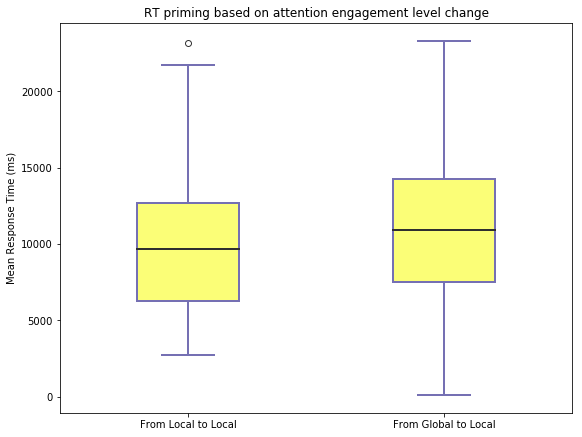

In [336]:
# Attention Level Change priming Box plot 

fig15 = plt.figure(15, figsize=(8, 6))
ax15 = fig15.add_subplot(111)
xlabels=['From Local to Local', 'From Global to Local']
databp = [RT_NoAttChange_L_L['RT'], RT_AttChange_G_L['RT']]
bp = ax15.boxplot(databp, widths=0.4, patch_artist=True)
# Colors
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#fbfe77' )
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
for median in bp['medians']:
    median.set(color='#2f2f2f', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.8)
ax15.set_xticklabels(xlabels)
fig15.tight_layout()
plt.ylabel('Mean Response Time (ms)')
plt.title('RT priming based on attention engagement level change')
plt.show()

In [337]:
# Save the figure
fig15.savefig('AttPriming-L-L-G-L-Boxes.png')

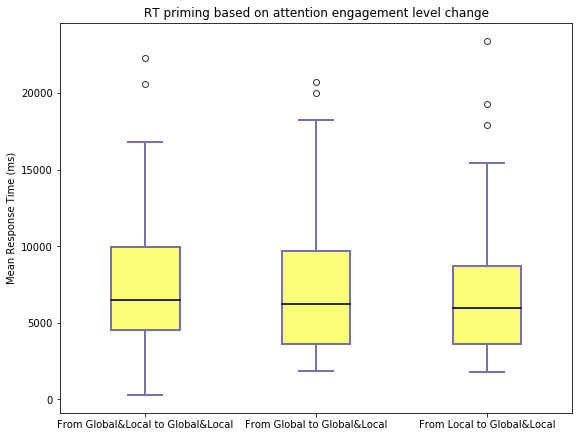

In [338]:
# Attention Level Change priming Box plot 

fig15 = plt.figure(15, figsize=(8, 6))
ax15 = fig15.add_subplot(111)
xlabels=['From Global&Local to Global&Local', 'From Global to Global&Local', 'From Local to Global&Local']
databp = [RT_NoAttChange_GL_GL['RT'], RT_AttChange_G_GL['RT'], RT_AttChange_L_GL['RT']]
bp = ax15.boxplot(databp, widths=0.4, patch_artist=True)
# Colors
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#fbfe77' )
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
for median in bp['medians']:
    median.set(color='#2f2f2f', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.8)
ax15.set_xticklabels(xlabels)
fig15.tight_layout()
plt.ylabel('Mean Response Time (ms)')
plt.title('RT priming based on attention engagement level change')
plt.show()

In [339]:
# Save the figure
fig15.savefig('AttPriming-L-G-G-L-N-Boxes.png')

In [340]:
# Save the figure
fig15.savefig('AttPriming-L-G-L-GL-G-L-GL-L-Boxes.png')

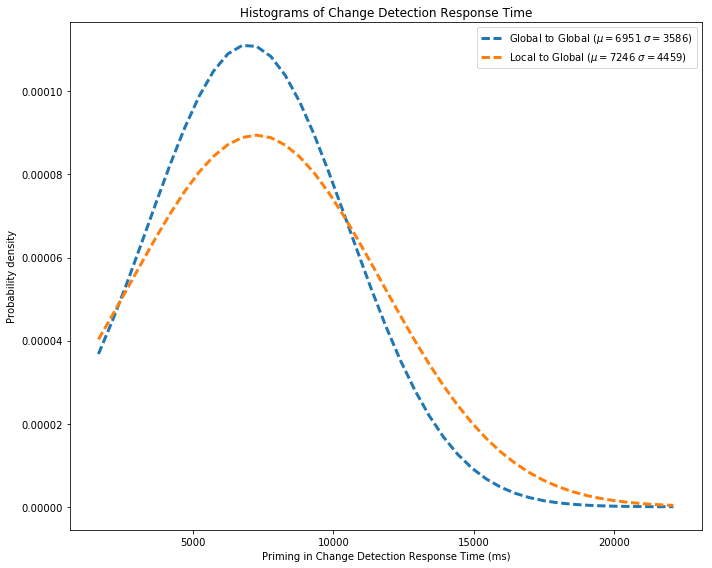

In [341]:
# Hist for attention engage priming

num_bins = 20

fig16 = plt.figure(16, figsize=(10, 8))
ax16 = fig16.add_subplot(111)

# the histogram of the data
# n, bins, patches = ax16.hist(RT_AttChange_L_G['Delta_RT'].values, num_bins, alpha=0.3, normed=1)
# n, bins, patches = ax16.hist(RT_AttChange_G_L['Delta_RT'].values, num_bins, alpha=0.3, normed=1)

y = mlab.normpdf(bins, int((RT_NoAttChange_G_G['RT'].values.mean())), int(RT_NoAttChange_G_G['RT'].std()))

ax16.plot(bins, y, '--', linewidth=3, label=r'Global to Global ($\mu=' + str(int(RT_NoAttChange_G_G['RT'].values.mean())) + '$ $\sigma= ' + str(int((RT_NoAttChange_G_G['RT'].std()))) + '$)')                                                          

y = mlab.normpdf(bins, int((RT_AttChange_L_G['RT'].values.mean())), int(RT_AttChange_L_G['RT'].std()))
                                                                              
ax16.plot(bins, y, '--', linewidth=3, label=r'Local to Global ($\mu=' + str(int(RT_AttChange_L_G['RT'].values.mean())) + '$ $\sigma= ' + str(int((RT_AttChange_L_G['RT'].std()))) + '$)')

ax16.set_xlabel('Priming in Change Detection Response Time (ms)')
ax16.set_ylabel('Probability density')
ax16.set_title('Histograms of Change Detection Response Time')
ax16.legend(loc="upper right")
# Tweak spacing to prevent clipping of ylabel
fig16.tight_layout()
plt.show()

In [342]:
# Save the figure
fig16.savefig('AttPriming-L-G-Dist.png')

KeyError: 'Delta_RT'

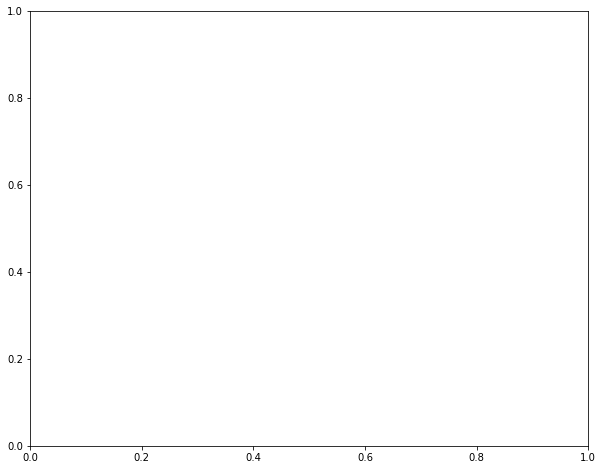

In [343]:
# Hist for attention engage priming

num_bins = 20

fig16 = plt.figure(16, figsize=(10, 8))
ax16 = fig16.add_subplot(111)

# the histogram of the data
n, bins, patches = ax16.hist(RT_AttChange_L_G['Delta_RT'].values, num_bins, alpha=0.3, normed=1)
n, bins, patches = ax16.hist(RT_AttChange_G_L['Delta_RT'].values, num_bins, alpha=0.3, normed=1)

y = mlab.normpdf(bins, int((RT_AttChange_L_G['Delta_RT'].values.mean())), int(RT_AttChange_L_G['Delta_RT'].std()))

ax16.plot(bins, y, '--', linewidth=3, label=r'Local to Global ($\mu=' + str(int(RT_AttChange_L_G['Delta_RT'].values.mean())) + '$ $\sigma= ' + str(int((RT_AttChange_L_G['Delta_RT'].std()))) + '$)')                                                          

y = mlab.normpdf(bins, int((RT_AttChange_G_L['Delta_RT'].values.mean())), int(RT_AttChange_G_L['Delta_RT'].std()))
                                                                              
ax16.plot(bins, y, '--', linewidth=3, label=r'Global to Local ($\mu=' + str(int(RT_AttChange_G_L['Delta_RT'].values.mean())) + '$ $\sigma= ' + str(int((RT_AttChange_G_L['Delta_RT'].std()))) + '$)')

ax16.set_xlabel('Priming in Change Detection Response Time (ms)')
ax16.set_ylabel('Probability density')
ax16.set_title('Histograms of Change Detection Response Time Delta')
ax16.legend(loc="upper right")
# Tweak spacing to prevent clipping of ylabel
fig16.tight_layout()
plt.show()

In [344]:
# Save the figure
fig16.savefig('AttPriming-L-G-Hist.png')

### Testing drafts

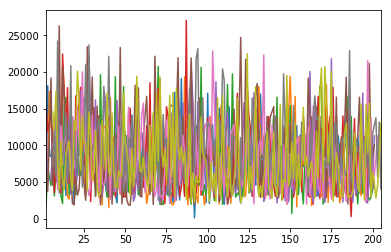

In [345]:
df1['matrix1.RT'].plot()
df2['matrix1.RT'].plot()
df3['matrix1.RT'].plot()
df4['matrix1.RT'].plot()
df5['matrix1.RT'].plot()
df6['matrix1.RT'].plot()
df7['matrix1.RT'].plot()
df8['matrix1.RT'].plot()
df9['matrix1.RT'].plot()